In [1]:
from linares_plot import *
import os
import datetime
from datetime import datetime as dt
import re
import statsmodels.formula.api as smf


In [2]:
##Actions Gea data
df_gea=pd.read_excel(os.getcwd() + '\\EVENTOS_GEA.xlsx', sheet_name='Hoja2' )
times_s = [df_gea.tiempo.iloc[i].minute*60 + df_gea.tiempo.iloc[i].second for i in range(len(df_gea))]
df_gea['times_s'] = times_s

### cambiar tiempo y tiempo_s por los corregidos, en los que se restan 10 minutos, 31 segundos. De esta manera, 
### los dos dataframes están sincronizados

new_times=[]
times_s_new=[]

for i in range(len(df_gea)):
    #print(i)
    h = df_gea.tiempo.iloc[i]
    h_t = str(h.hour) + ':' + str(h.minute) + ':' + str(h.second) 
    substracting = '00:10:31'
    new_time = dt.strptime(h_t, "%H:%M:%S") - dt.strptime(substracting, "%H:%M:%S")
    new_times.append(new_time)
    ##
    times_s_new.append(df_gea.times_s.loc[i] - (60*10 + 31) ) 

    
df_gea['tiempo'] = new_times 
df_gea['times_s'] = times_s_new 

df_gea = df_gea.sort_values(by=['times_s'])

df_gea= df_gea.reset_index()
df_gea = df_gea[['tiempo', 'evento', 'decripcion', 'times_s']]
df_gea['evento_'] = df_gea['evento'].copy()
df_gea['evento_'] = df_gea['evento_'].replace(['Miniclimax', 'Climax final' ], ['climax', 'climax']) #for simplicity
df_gea.head()

,tiempo,evento,decripcion,times_s,evento_
0,00:00:27,gag,broma sobre su dominio del catalán,27,gag
1,00:00:34,gag,"""Por deferencia""",34,gag
2,00:00:46,inicio,Abre el estuche de la baraja,46,inicio
3,00:01:05,gag,"""Que haya público""",65,gag
4,00:01:19,gag,"""El público de schroedinger""",79,gag


In [3]:
df_gea.loc[df_gea['evento']=='inicio']

,tiempo,evento,decripcion,times_s,evento_
2,00:00:46,inicio,Abre el estuche de la baraja,46,inicio
23,00:06:57,inicio,Abre el estuche de la baraja,417,inicio
46,00:09:44,inicio,Gea se sienta para iniciar matrix,584,inicio
57,00:12:38,inicio,La invisible,758,inicio
70,00:16:23,inicio,Gea toma monedas y vaso,983,inicio
93,00:21:27,inicio,Abre el estuche de cartas,1287,inicio
141,00:32:18,inicio,Abre el estuche de cartas,1938,inicio
149,00:35:12,inicio,abre el estuche de cartas,2112,inicio


In [4]:
##Memory data
df_ = pd.read_excel('C:\\Users\\David\\Documents\\GitHub\\Gea_memory\\df_proces.xlsx') 

df_int = df_.loc[(df_['session']==1) & ((df_['juego']==1) | (df_['juego']==2) | (df_['juego']==3)  | 
                               (df_['juego']==4)  | (df_['juego']==5)  | (df_['juego']==6)  | 
                               (df_['juego']==7) | (df_['juego']==8)), 
        ['recuerdo', 'juego', 'asiento', 'subj', 'tiempo', 'n_saliencias', 'edad', 'sexo']]

df_int = df_int.reset_index(drop=True) 
df_int['subj']=df_int['subj']+1
df_int.head()

,recuerdo,juego,asiento,subj,tiempo,n_saliencias,edad,sexo
0,0,1,38,1,1,0,24,m
1,0,2,38,1,1,0,24,m
2,0,3,38,1,1,0,24,m
3,1,4,38,1,1,1,24,m
4,1,5,38,1,1,3,24,m


## Procesado de datos  
Hasta ahora se hace en cada truco. Cuanod los excels estén correctos, las siguientes cells se pueden poner en un loop y se pondrán todos los trucos juntos.  
***en el 5 hay muchas A sin label, les he puetso 1  
faltan la gran mayoria del 6, les he puesto 1***

In [5]:
#T= 'Truco 1'
#Df=pd.read_excel(os.getcwd() + '\\ANOTACIONES2.xlsx', sheet_name= T )

# list_columns_subjects = list(Df.columns)
# list_columns_subjects.remove('tiempo')

# list_columns_subjects=list_columns_subjects[70:77] ## para ir comprobando, una a una, que no haya espacios vacíos!

# frames=[]

# for subject in list_columns_subjects:
#     print(subject)
#     dfs = Df[['tiempo', subject]]
#     dfs = dfs.loc[~pd.isna(dfs[subject])] # Quitar todos los NaN (qudarnos solo con los eventos)
#     ####################################### Añadir una columna de segundos
#     times_s=[]
#     for i in range(0, len(dfs)):
#         l = dfs.tiempo.iloc[i]
#         times_s.append(  int(datetime.timedelta(hours=l.hour, minutes=l.minute, seconds=l.second).total_seconds()) )
#     #
#     dfs.columns=['tiempo', 'event']
#     dfs['time_s'] = times_s
#     ####################################### Añadir columna de subject y de truco
#     dfs['trick'] = int(T.split(' ')[-1]) ## last character of the string is the number of the trick
#     dfs['subject'] = int(re.findall('\d+', subject)[0]) ##separate leter from number
#     frames.append(dfs)
    
    
# #dfs=pd.concat(frames)
# #dfs.head()

# dfs.iloc[30:, :]
# dfs



In [6]:
# list_columns_subjects = list(Df.columns)
# list_columns_subjects.remove('tiempo')

##list_columns_subjects=list_columns_subjects[0:2] ## para ir comprobando, una a una, que no haya espacios vacíos!

frames=[]

trick_list=['Truco 1','Truco 2','Truco 3','Truco 4','Truco 5','Truco 6','Truco 7','Truco 8']

for T in trick_list:
    print(T)
    Df=pd.read_excel(os.getcwd() + '\\ANOTACIONES2.xlsx', sheet_name= T )
    list_columns_subjects = list(Df.columns)
    list_columns_subjects.remove('tiempo')
    for subject in list_columns_subjects:
        #print(subject)
        dfs = Df[['tiempo', subject]]
        dfs = dfs.loc[~pd.isna(dfs[subject])] # Quitar todos los NaN (qudarnos solo con los eventos)
        ####################################### Añadir una columna de segundos
        times_s=[]
        for i in range(0, len(dfs)):
            l = dfs.tiempo.iloc[i]
            times_s.append(  int(datetime.timedelta(hours=l.hour, minutes=l.minute, seconds=l.second).total_seconds()) )
        #
        dfs.columns=['tiempo', 'event']
        dfs['time_s'] = times_s
        ####################################### Añadir columna de subject y de truco
        dfs['trick'] = int(T.split(' ')[-1]) ## last character of the string is the number of the trick
        dfs['subject'] = int(re.findall('\d+', subject)[0]) ##separate leter from number
        frames.append(dfs)

    
dfs=pd.concat(frames)
dfs.head()

Truco 1
Truco 2
Truco 3
Truco 4
Truco 5
Truco 6
Truco 7
Truco 8


,tiempo,event,time_s,trick,subject
3,00:00:06,Se,6,1,1
5,00:00:10,Si,10,1,1
6,00:00:12,N,12,1,1
16,00:00:32,In,32,1,1
31,00:01:02,In,62,1,1


In [7]:
dfs.event.unique()

array(['Se', 'Si ', 'N', 'In', 'L', 'N*', 'I', 'L*', 'S', 'a1', 'F', 'C',
       'S*', 'A8', 'A7', 'R', 'P', 'Si', 'a4', 'M', 'a3', 'D', '  C',
       'AA10', 'A5', 'O', 'O*', 'O ', 'A+6', 'A+7', 'AA+10', 'A6', 'B',
       'A+9', 'A+5', 'a+3', 'In ', 'a2', 'A9', 'PV', 'AA11', 'L ', 'C ',
       'A08', 'a+2', 'A4', 'I   ', 'O  ', 'In   ', 'T', 'a+4', 'A+8',
       'VP', 'N ', 'a5', 'p', 'S ', 'P ', 'F  ', 'M  ', 'N  ', 'P*',
       'A+1', 'AA+11', 'AA+13', 'AA+12', 'AA+14', 'A1', 'R ', 'AA+17',
       'IN', 'A3', 'A 1', 'AA12', 'D*', 'I*', 'SI', 'VP ', 'S  ', 'AA1',
       'L  ', 'A0', 'F ', 'AA14', 'AA19', 'N* ', 'AA15', 'A13', 'AA16',
       'A15', 'A12', 'AA+19', 'A+18', 'AA+27', 'AA27', 'AA26', 'A+26',
       'AA28', 'A+25', 'AA+28', 'AA+26', 'a7', 'A11', 'AA23', 'AA+25',
       'A19', 'a8', 'AA+24', 'AA+18', 'AA+23', 'a6'], dtype=object)

In [8]:
dfs['event'] = dfs['event'].replace(['L '], ['L'])
dfs['event'] = dfs['event'].replace(['L  '], ['L'])
dfs['event'] = dfs['event'].replace(['Si '], ['Si'])
dfs['event'] = dfs['event'].replace(['SI'], ['Si'])
dfs['event'] = dfs['event'].replace(['O '], ['O'])
dfs['event'] = dfs['event'].replace(['O  '], ['O'])
dfs['event'] = dfs['event'].replace(['In '], ['In'])
dfs['event'] = dfs['event'].replace(['In  '], ['In'])
dfs['event'] = dfs['event'].replace(['In   '], ['In'])
dfs['event'] = dfs['event'].replace(['IN'], ['In'])
dfs['event'] = dfs['event'].replace(['I  '], ['I'])
dfs['event'] = dfs['event'].replace(['I   '], ['I'])
dfs['event'] = dfs['event'].replace(['C '], ['C'])
dfs['event'] = dfs['event'].replace(['  C'], ['C'])
dfs['event'] = dfs['event'].replace(['In '], ['In'])
dfs['event'] = dfs['event'].replace(['N '], ['N'])
dfs['event'] = dfs['event'].replace(['N  '], ['N'])
dfs['event'] = dfs['event'].replace(['N* '], ['N*'])
dfs['event'] = dfs['event'].replace(['N*  '], ['N*'])
dfs['event'] = dfs['event'].replace(['VP '], ['VP'])
dfs['event'] = dfs['event'].replace(['PV'], ['VP'])
dfs['event'] = dfs['event'].replace(['S '], ['S'])
dfs['event'] = dfs['event'].replace(['S  '], ['S'])
dfs['event'] = dfs['event'].replace(['F '], ['F'])
dfs['event'] = dfs['event'].replace(['F  '], ['F'])
dfs['event'] = dfs['event'].replace(['P '], ['P'])
dfs['event'] = dfs['event'].replace(['p'], ['P'])
dfs['event'] = dfs['event'].replace(['p*'], ['P*'])
dfs['event'] = dfs['event'].replace(['M '], ['M'])
dfs['event'] = dfs['event'].replace(['M  '], ['M'])
dfs['event'] = dfs['event'].replace(['R '], ['R'])
dfs['event'] = dfs['event'].replace(['A 1'], ['A1'])

In [9]:
dfs.event.unique()

array(['Se', 'Si', 'N', 'In', 'L', 'N*', 'I', 'L*', 'S', 'a1', 'F', 'C',
       'S*', 'A8', 'A7', 'R', 'P', 'a4', 'M', 'a3', 'D', 'AA10', 'A5',
       'O', 'O*', 'A+6', 'A+7', 'AA+10', 'A6', 'B', 'A+9', 'A+5', 'a+3',
       'a2', 'A9', 'VP', 'AA11', 'A08', 'a+2', 'A4', 'T', 'a+4', 'A+8',
       'a5', 'P*', 'A+1', 'AA+11', 'AA+13', 'AA+12', 'AA+14', 'A1',
       'AA+17', 'A3', 'AA12', 'D*', 'I*', 'AA1', 'A0', 'AA14', 'AA19',
       'AA15', 'A13', 'AA16', 'A15', 'A12', 'AA+19', 'A+18', 'AA+27',
       'AA27', 'AA26', 'A+26', 'AA28', 'A+25', 'AA+28', 'AA+26', 'a7',
       'A11', 'AA23', 'AA+25', 'A19', 'a8', 'AA+24', 'AA+18', 'AA+23',
       'a6'], dtype=object)

In [10]:
df_subjects=[]

for subject in dfs.subject.unique():
    #print(subject)
    ####################################################### get the subject and sort by time, add duration and reset index
    df_x = dfs.loc[dfs['subject']==subject]
    df_x = df_x.sort_values(by=['time_s'])
    df_x['duration']=1
    df_x = df_x.reset_index(drop=True) 
    ###################################################### get actions with * --> calculate durations of previous and eliminate * actions
    boole=[] ###bolean to get the final of actions
    for i in range(len(df_x)):
        stri = df_x['event'].iloc[i]
        boole.append( stri[-1]=='*' )
    #
    boole=np.array(boole)
    finals = df_x[boole]
    for fi in range(len(finals)):
        event_final = finals.event.iloc[fi][:-1] ##without the astherisc
        time_final = finals.time_s.iloc[fi]
        #
        previous_event = df_x.loc[(df_x['event']==event_final) & (df_x['time_s']<time_final) ].iloc[-1] ##get the last one
        duration_event = time_final - previous_event.time_s
        ## Change the duration of the dataframe
        df_x.at[previous_event.name, 'duration'] = duration_event
    #
    df_x = df_x[~boole] ### remove the events with astherist
    ######################################################  gat applauses --> add duration (break A)
    boole_apl=[] ###bolean to get the final of actions
    for i in range(len(df_x)):
        stri = df_x['event'].iloc[i]
        if stri[0]=='a':
            boole_apl.append(True)
        elif stri[0]=='A':
            boole_apl.append(True)
        else:
            boole_apl.append(False)
    #
    boole_apl=np.array(boole_apl)    
    aplauses = df_x[boole_apl]
    for ap in range(len(aplauses)):
        event_ = aplauses.iloc[ap] 
        name_event = event_.event
        duration_app = int(re.findall('\d+', name_event)[0])
        evnt = re.split('(\d+)', name_event)[0]
        #
        df_x.at[event_.name, 'duration'] = duration_app
        df_x.at[event_.name, 'event'] = evnt
    ###
    df_subjects.append(df_x)
    #
#



df_subjects=pd.concat(df_subjects)
df_subjects.head()

,tiempo,event,time_s,trick,subject,duration
0,00:00:06,Se,6,1,1,1
1,00:00:10,Si,10,1,1,1
2,00:00:12,N,12,1,1,102
3,00:00:32,In,32,1,1,1
4,00:01:02,In,62,1,1,1


In [11]:
### Anotaciones de risa y sonrisa
df_subjects_risa=[]

for T in trick_list:
    df_risa = pd.read_excel(os.getcwd() + '\\ANOTACIONES3.xlsx', sheet_name= T )

    list_columns_subjects = list(df_risa.columns)
    list_columns_subjects.remove('Tiempo')
    list_columns_subjects=list_columns_subjects ## para ir comprobando, una a una, que no haya espacios vacíos!    

    for COL in list_columns_subjects:
        event_type = COL[0]
        subject = int(re.findall('\d+', COL)[0])
        df_x=df_risa[['Tiempo', COL]]
        times_s=[]
        for i in range(0, len(df_x)):
            l = df_x.Tiempo.iloc[i]
            times_s.append( int(datetime.timedelta(hours=l.hour, minutes=l.minute, seconds=l.second).total_seconds())  )
        #
        df_x.columns=['tiempo', 'event']
        df_x['time_s'] = times_s
        ##########################################################
        #### get starts and durations
        counter=0
        starts=[]
        finals=[]
        for i in range(0, len(df_x)):
            if df_x.iloc[i, 1]==0:
                if counter==0:
                    pass
                else:
                    finals.append([df_x.loc[i, 'tiempo'], df_x.loc[i, 'event'], df_x.loc[i, 'time_s']])
                    counter=0
            elif df_x.iloc[i, 1]==1:
                if counter==0:
                    starts.append([df_x.loc[i, 'tiempo'], df_x.loc[i, 'event'], df_x.loc[i, 'time_s']])
                counter+=1
            ###
            if i==len(df_x)-1: ##si al final todavia están
                if counter !=0:
                    finals.append([df_x.loc[i, 'tiempo'], df_x.loc[i, 'event'], df_x.loc[i, 'time_s']])
        ###
        ###
        if len(starts)>0:
            durations = np.array(finals)[:, -1] - np.array(starts)[:, -1]
            ###
            df_evnt = pd.DataFrame(starts)
            df_evnt.columns=['tiempo', 'event', 'time_s']
            df_evnt['event'] = event_type
            df_evnt['duration'] = durations
            df_evnt['subject'] = subject
            df_evnt['trick']= int(T.split(' ')[-1]) 
            df_subjects_risa.append(df_evnt)
            #print('append')
        #else:
            #print('nothing')


        
df_subjects_risa=pd.concat(df_subjects_risa)
df_subjects_risa.head()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,tiempo,event,time_s,duration,subject,trick
0,00:02:20,S,140,12,1,1
1,00:02:36,S,156,2,1,1
2,00:02:46,S,166,2,1,1
3,00:03:18,S,198,4,1,1
4,00:03:48,S,228,6,1,1


In [12]:
##cambiando los S y los R de anotaciones2 por los de anotaciones3
df_subjects2 = df_subjects.reset_index(drop=True) 
df1 = df_subjects2.drop(df_subjects2[(df_subjects2['event']=='R') | (df_subjects2['event']=='S') ].index)
df_comb = pd.concat([df1, df_subjects_risa])
df_comb = df_comb.sort_values(by=['subject', 'trick', 'time_s']) #primero por subject y, dentro de subject, por tiempo
df_comb = df_comb.reset_index(drop=True) 

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [13]:
df_comb.head()

,duration,event,subject,tiempo,time_s,trick
0,1,Se,1,00:00:06,6,1
1,1,Si,1,00:00:10,10,1
2,102,N,1,00:00:12,12,1
3,1,In,1,00:00:32,32,1
4,1,In,1,00:01:02,62,1


In [14]:
### añadir los eventos previos y posteriores y la memoria

df_subjects_comb=[]

for subject in df_comb.subject.unique():
    print(subject)
    for trick_ in list(np.arange(1,9)):
        #
        df_x=df_comb.loc[(df_comb['subject']==subject) & (df_comb['trick']==trick_) ]
        ###################################################### get previous action of the magician and Reaction time respect it
        prev_event=[]
        times_after=[]
        for evnt in range(len(df_x)):
            time_ = df_x.iloc[evnt].time_s    
            previous_events_gea = df_gea.loc[df_gea['times_s']<=time_]
            if len(previous_events_gea)==0:
                prev_event.append('None')
                times_after.append(-1)
            else:
                previous_event=previous_events_gea.evento.iloc[-1]
                prev_event.append(previous_event)
                time_after = df_x.time_s.iloc[evnt] - previous_events_gea.times_s.iloc[-1]
                times_after.append(time_after)
        ##
        df_x['RT'] = times_after
        df_x['previous_event'] = prev_event
        ###################################################### get future action of the magician and anticiipation time respect it
        next_event=[]
        times_before=[]
        for evnt in range(len(df_x)): 
            time_ = df_x.iloc[evnt].time_s    
            posts_events_gea = df_gea.loc[df_gea['times_s']>=time_]
            if len(posts_events_gea)==0:
                next_event.append('None')
                times_before.append(1)
            else:
                next_evnt=posts_events_gea.evento.iloc[0]
                next_event.append(next_evnt)
                time_before = df_x.time_s.iloc[evnt] - posts_events_gea.times_s.iloc[0]
                times_before.append(time_before)
        ##
        df_x['anticip_time'] = times_before
        df_x['next_event'] = next_event
        ###################################################### add memory data
        ###
        if len(df_int.loc[(df_int['subj']==subject) & (df_int['juego']==trick_) & (df_int['tiempo']==1)]):
            r1 = df_int.loc[(df_int['subj']==subject) & (df_int['juego']==trick_) & (df_int['tiempo']==1)].recuerdo.iloc[0]
        else:
            r1='Miss'

        if len(df_int.loc[(df_int['subj']==subject) & (df_int['juego']==trick_) & (df_int['tiempo']==2)]):
            r2 = df_int.loc[(df_int['subj']==subject) & (df_int['juego']==trick_) & (df_int['tiempo']==2)].recuerdo.iloc[0]
        else:
            r2='Miss'

        if len(df_int.loc[(df_int['subj']==subject) & (df_int['juego']==trick_) & (df_int['tiempo']==3)]):
            r3 = df_int.loc[(df_int['subj']==subject) & (df_int['juego']==trick_) & (df_int['tiempo']==3)].recuerdo.iloc[0]
        else:
            r3='Miss'

        if len(df_int.loc[(df_int['subj']==subject) & (df_int['juego']==trick_) & (df_int['tiempo']==4)]):
            r4 = df_int.loc[(df_int['subj']==subject) & (df_int['juego']==trick_) & (df_int['tiempo']==4)].recuerdo.iloc[0]
        else:
            r4='Miss'

        df_x['r1'] = r1
        df_x['r2'] = r2
        df_x['r3'] = r3
        df_x['r4'] = r4
        ######################################################

        df_subjects_comb.append(df_x)


1


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38


In [15]:
df=pd.concat(df_subjects_comb)
df.head()

,duration,event,subject,tiempo,time_s,trick,RT,previous_event,anticip_time,next_event,r1,r2,r3,r4
0,1,Se,1,00:00:06,6,1,-1,None,-21,gag,0,0,0,0
1,1,Si,1,00:00:10,10,1,-1,None,-17,gag,0,0,0,0
2,102,N,1,00:00:12,12,1,-1,None,-15,gag,0,0,0,0
3,1,In,1,00:00:32,32,1,5,gag,-2,gag,0,0,0,0
4,1,In,1,00:01:02,62,1,16,inicio,-3,gag,0,0,0,0


## Plots

#### individual plot

In [20]:
trick_=8

In [21]:
df_appl = df.loc[(df['trick']==trick_) & ( (df['event']=='A') | (df['event']=='AA') 
                                                       | (df['event']=='a') | (df['event']=='A+') 
                                                          | (df['event']=='a+') | (df['event']=='AA+') 
                                                           )  ]
df_appl = df_appl[['time_s', 'duration']]
df_appl = df_appl.sort_values('time_s')
df_appl['val']=1

start_trick, end_trick =  df.loc[(df['trick']==trick_), 'time_s'].min(), df.loc[(df['trick']==trick_), 'time_s'].max()

xs = np.arange(start_trick, end_trick+2,2)
missing_times=[]
for t in xs:
    if t not in df_appl.time_s.unique():
        missing_times.append([t, 0, 0])
        
df_miss = pd.DataFrame(missing_times)
df_miss.columns=df_appl.columns
df_appl = pd.concat([df_appl, df_miss])
df_appl['general_label'] ='applause'


########################################################################################################################
########################################################################################################################

df_humr = df.loc[(df['trick']==trick_) & ( (df['event']=='S') |  (df['event']=='R')   )  ]
df_humr = df_humr[['time_s', 'duration']]
df_humr = df_humr.sort_values('time_s')
df_humr['val']=1


xs = np.arange(start_trick, end_trick+2,2)
missing_times=[]
for t in xs:
    if t not in df_humr.time_s.unique():
        missing_times.append([t, 0, 0])
        
df_miss = pd.DataFrame(missing_times)
df_miss.columns=df_humr.columns
df_humr = pd.concat([df_humr, df_miss])
df_humr['general_label'] ='humor'


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


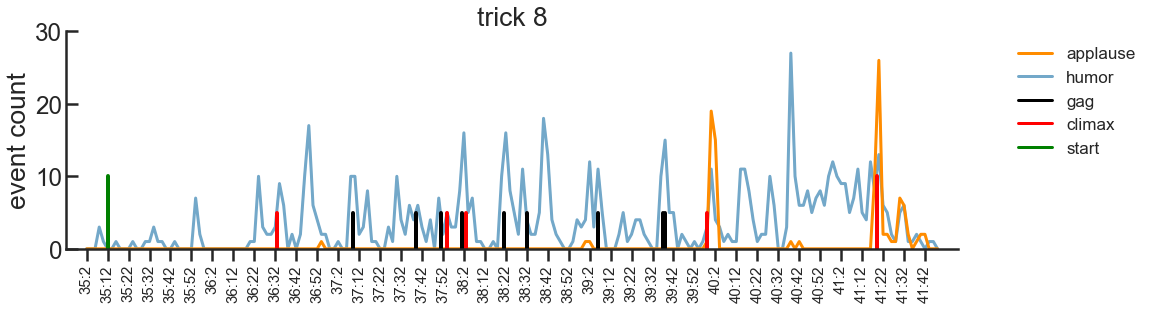

In [22]:
plt.figure(figsize=(16,4)) 

c_humor = '#73a8c9'
c_app = 'darkorange'
sns.lineplot(x='time_s', y='val', data=df_humr, color=c_humor, estimator=np.sum, linewidth=3)
sns.lineplot(x='time_s', y='val', data=df_appl, color=c_app, estimator=np.sum, linewidth=3)


events_trick = df_gea.loc[(df_gea['times_s']>start_trick) & (df_gea['times_s']<end_trick)]

for i in range(len(events_trick)):
    time_event = events_trick.iloc[i].times_s
    nature_event = events_trick.iloc[i].evento
    if nature_event == 'gag':        
        plt.plot([time_event, time_event], [0, 5], color='black', linewidth=4 )
    if nature_event == 'inicio':    
        plt.plot([time_event, time_event], [0, 10], color='green', linewidth=4 )
    elif nature_event == 'Miniclimax':        
        plt.plot([time_event, time_event], [0, 5], color='red', linewidth=4 )
    elif nature_event == 'Climax final':        
        plt.plot([time_event, time_event], [0, 10], color='red', linewidth=4 )
    else:
        pass

    
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)  
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params('y', direction='in') #direction
plt.gca().tick_params('x', direction='out') #direction



plt.xlim(start_trick-10, end_trick+10)
x_ticks = list(np.arange(start_trick, end_trick, 10) )
times_x = np.array(x_ticks)
t_m = times_x/60

strings_time=[]
for T in t_m:
    minute = int(T)
    sec = int(round((T - minute) * 60 ))
    str_time = str(minute) + ':' + str(sec)
    strings_time.append(str_time)



plt.gca().set_xticks(x_ticks);
plt.gca().set_xticklabels(strings_time, rotation=90, fontsize=15);
plt.ylabel('event count')
plt.xlabel('')
plt.ylim(0,30)

plt.plot([20,21], [100,102], c_app, label='applause')
plt.plot([20,21], [100,102], c_humor, label='humor')
plt.plot([20,21], [100,102], 'black', label='gag')
plt.plot([20,21], [100,102], 'red', label='climax')
plt.plot([20,21], [100,102], 'green', label='start')

plt.legend(frameon=False, prop={'size': 17}, bbox_to_anchor=(1.05, 1))
plt.title('trick ' + str(trick_))
plt.show()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


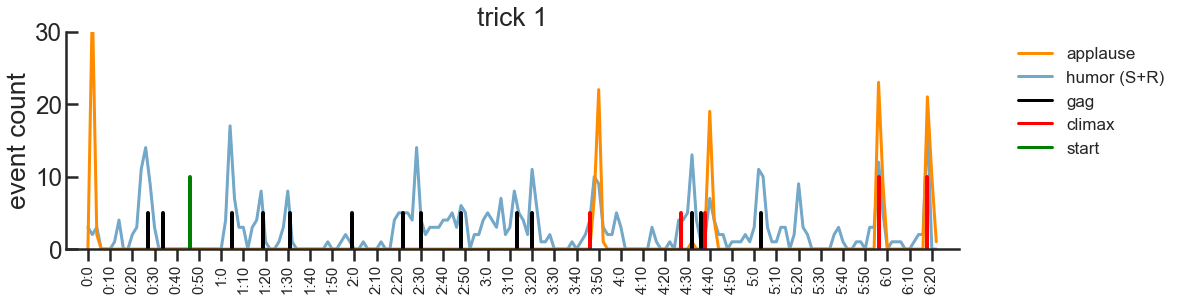

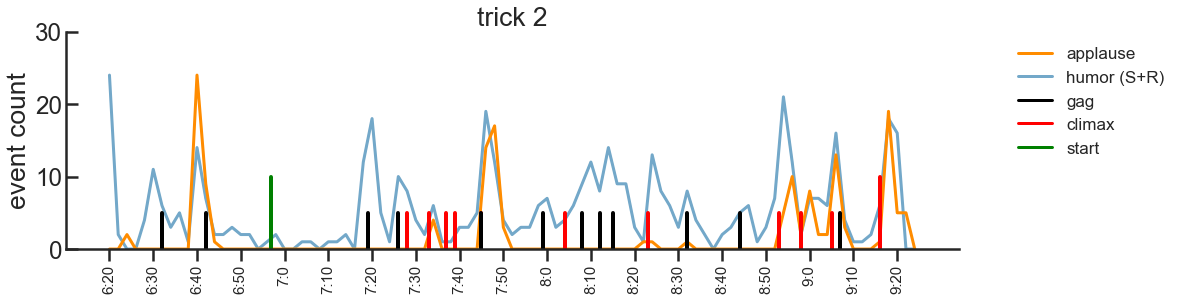

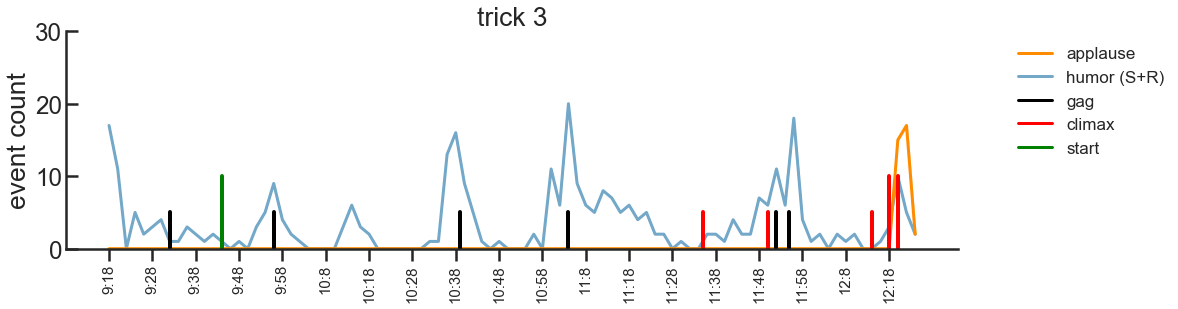

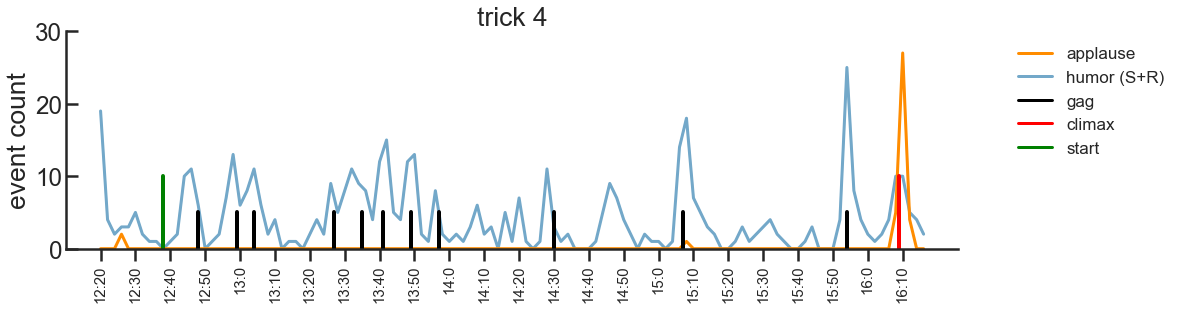

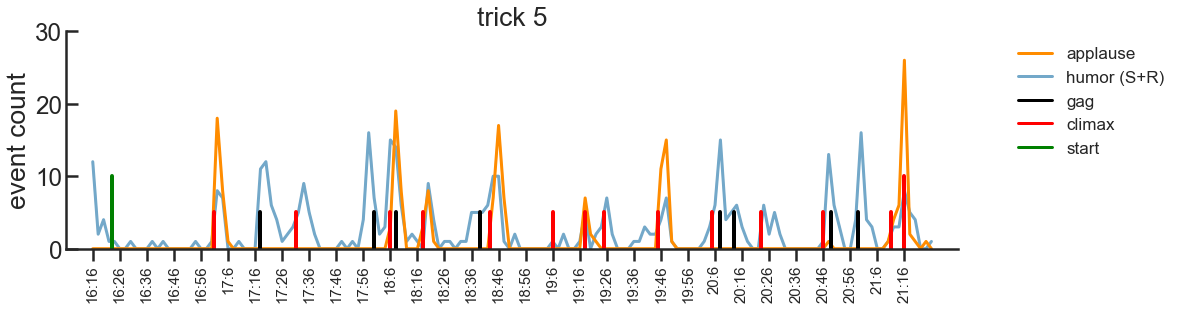

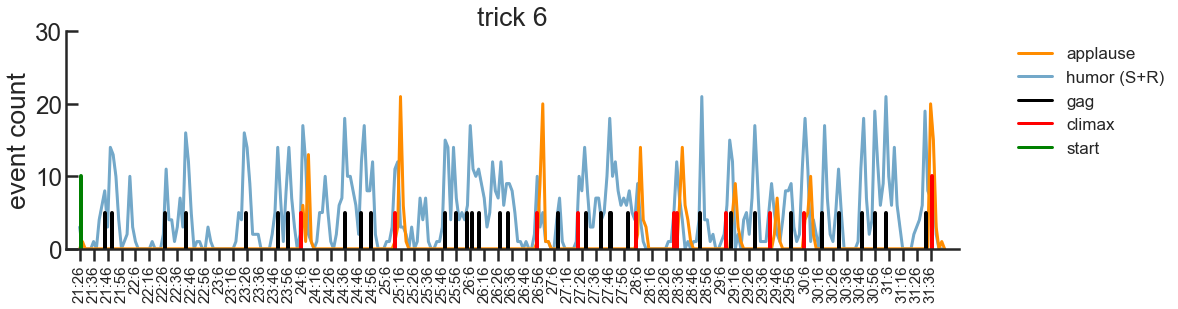

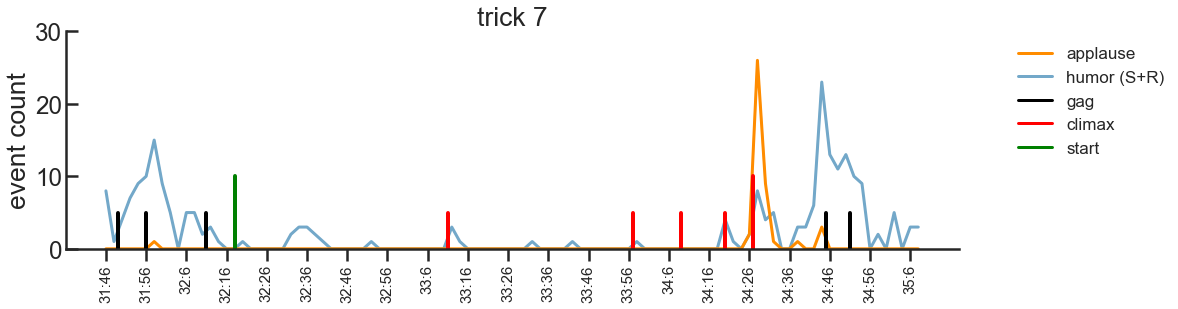

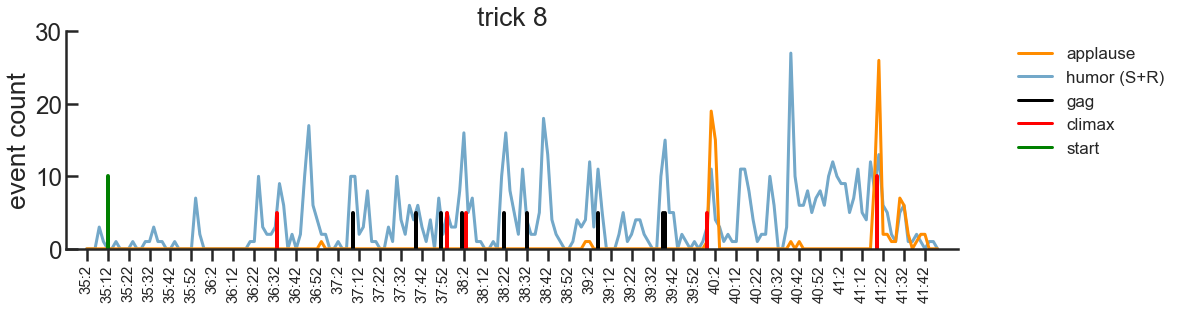

In [16]:
for trick_ in [1,2,3,4,5,6,7,8]:
    df_appl = df.loc[(df['trick']==trick_) & ( (df['event']=='A') | (df['event']=='AA') 
                                                       | (df['event']=='a') | (df['event']=='A+') 
                                                          | (df['event']=='a+') | (df['event']=='AA+') 
                                                           )  ]
    #
    df_appl = df_appl[['time_s', 'duration']]
    df_appl = df_appl.sort_values('time_s')
    df_appl['val']=1

    start_trick, end_trick =  df.loc[(df['trick']==trick_), 'time_s'].min(), df.loc[(df['trick']==trick_), 'time_s'].max()

    xs = np.arange(start_trick, end_trick+2,2)
    missing_times=[]
    for t in xs:
        if t not in df_appl.time_s.unique():
            missing_times.append([t, 0, 0])

    df_miss = pd.DataFrame(missing_times)
    df_miss.columns=df_appl.columns
    df_appl = pd.concat([df_appl, df_miss])
    df_appl['general_label'] ='applause'


    ########################################################################################################################
    ########################################################################################################################

    df_humr = df.loc[(df['trick']==trick_) & ( (df['event']=='S') |  (df['event']=='R')   )  ]
    df_humr = df_humr[['time_s', 'duration']]
    df_humr = df_humr.sort_values('time_s')
    df_humr['val']=1


    xs = np.arange(start_trick, end_trick+2,2)
    missing_times=[]
    for t in xs:
        if t not in df_humr.time_s.unique():
            missing_times.append([t, 0, 0])

    df_miss = pd.DataFrame(missing_times)
    df_miss.columns=df_humr.columns
    df_humr = pd.concat([df_humr, df_miss])
    df_humr['general_label'] ='humor'


    plt.figure(figsize=(16,4)) 

    c_humor = '#73a8c9'
    c_app = 'darkorange'
    sns.lineplot(x='time_s', y='val', data=df_humr, color=c_humor, estimator=np.sum, linewidth=3)
    sns.lineplot(x='time_s', y='val', data=df_appl, color=c_app, estimator=np.sum, linewidth=3)


    events_trick = df_gea.loc[(df_gea['times_s']>start_trick) & (df_gea['times_s']<end_trick)]

    for i in range(len(events_trick)):
        time_event = events_trick.iloc[i].times_s
        nature_event = events_trick.iloc[i].evento
        if nature_event == 'gag':        
            plt.plot([time_event, time_event], [0, 5], color='black', linewidth=4 )
        if nature_event == 'inicio':    
            plt.plot([time_event, time_event], [0, 10], color='green', linewidth=4 )
        elif nature_event == 'Miniclimax':        
            plt.plot([time_event, time_event], [0, 5], color='red', linewidth=4 )
        elif nature_event == 'Climax final':        
            plt.plot([time_event, time_event], [0, 10], color='red', linewidth=4 )
        else:
            pass


    plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
    plt.gca().spines['top'].set_visible(False)  
    plt.gca().get_yaxis().tick_left()
    plt.gca().tick_params('y', direction='in') #direction
    plt.gca().tick_params('x', direction='out') #direction



    plt.xlim(start_trick-10, end_trick+10)
    x_ticks = list(np.arange(start_trick, end_trick, 10) )
    times_x = np.array(x_ticks)
    t_m = times_x/60

    strings_time=[]
    for T in t_m:
        minute = int(T)
        sec = int(round((T - minute) * 60 ))
        str_time = str(minute) + ':' + str(sec)
        strings_time.append(str_time)



    plt.gca().set_xticks(x_ticks);
    plt.gca().set_xticklabels(strings_time, rotation=90, fontsize=15);
    plt.ylabel('event count')
    plt.xlabel('')
    plt.ylim(0,30)

    plt.plot([20,21], [100,102], c_app, label='applause')
    plt.plot([20,21], [100,102], c_humor, label='humor (S+R)')
    plt.plot([20,21], [100,102], 'black', label='gag')
    plt.plot([20,21], [100,102], 'red', label='climax')
    plt.plot([20,21], [100,102], 'green', label='start')

    plt.legend(frameon=False, prop={'size': 17}, bbox_to_anchor=(1.05, 1))
    plt.title('trick ' + str(trick_))
    plt.show()

### Staring time responses

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

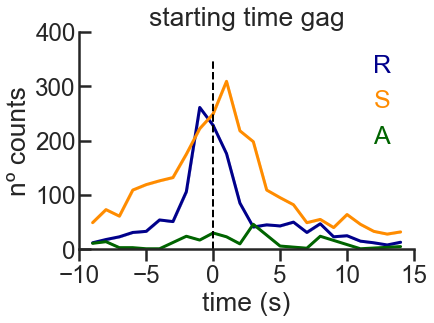

In [23]:
r_pre=df.loc[(df['next_event']=='gag') & (df['event']=='R') & (df['anticip_time']>-10)]
r_pre['val']=1
r_post=df.loc[(df['previous_event']=='gag') & (df['event']=='R') & (df['RT']<15)]
r_post['val']=1

s_pre=df.loc[(df['next_event']=='gag') & (df['event']=='S') & (df['anticip_time']>-10)]
s_pre['val']=1
s_post=df.loc[(df['previous_event']=='gag') & (df['event']=='S') & (df['RT']<15)]
s_post['val']=1

a_pre = df.loc[(df['next_event']=='gag') & ((df['event']=='A')  | (df['event']=='a') |
                                   (df['event']=='AA') | (df['event']=='A+') |
                                   (df['event']=='AA+') | (df['event']=='a+')  )& (df['anticip_time']>-10)]
a_pre['val'] = 1
a_post = df.loc[(df['previous_event']=='gag') & ((df['event']=='A')  | (df['event']=='a') |
                                   (df['event']=='AA') | (df['event']=='A+') |
                                   (df['event']=='AA+') | (df['event']=='a+')  )& (df['RT']<15)]
a_post['val'] = 1

##########

sns.lineplot('anticip_time', 'val', estimator=np.sum, data=r_pre, color='darkblue')
sns.lineplot('RT', 'val', estimator=np.sum, data=r_post, label='R', color='darkblue')

sns.lineplot('anticip_time', 'val', estimator=np.sum, data=s_pre, color='darkorange')
sns.lineplot('RT', 'val', estimator=np.sum, data=s_post, label='S', color='darkorange')

sns.lineplot('anticip_time', 'val', estimator=np.sum, data=a_pre, color='darkgreen')
sns.lineplot('RT', 'val', estimator=np.sum, data=a_post, label='S', color='darkgreen')

plt.plot([0,0], [0,350], '--k', linewidth=2)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)  
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params('y', direction='in') #direction
plt.gca().tick_params('x', direction='out') #direction
plt.xlim(-10,15)
plt.xticks([-10, -5, 0, 5, 10, 15])
plt.ylim(0,400)
plt.yticks([0, 100, 200, 300, 400])
plt.ylabel('nº counts')
plt.xlabel('time (s)')
plt.title('starting time gag')

hue_order=['R', 'S', 'A']
palette=['darkblue', 'darkorange', 'darkgreen']
l = plt.legend(loc=1, frameon=False, prop={'size': 25})
for i_h, h_idx in enumerate(hue_order):
    l.get_texts()[i_h].set_text(h_idx)
    l.legendHandles[i_h].set_visible(False);
    l.get_texts()[i_h].set_color(palette[i_h]);

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

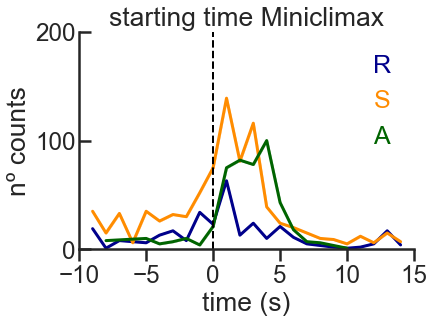

In [24]:
r_pre=df.loc[(df['next_event']=='Miniclimax') & (df['event']=='R') & (df['anticip_time']>-10)]
r_pre['val']=1
r_post=df.loc[(df['previous_event']=='Miniclimax') & (df['event']=='R') & (df['RT']<15)]
r_post['val']=1

s_pre=df.loc[(df['next_event']=='Miniclimax') & (df['event']=='S') & (df['anticip_time']>-10)]
s_pre['val']=1
s_post=df.loc[(df['previous_event']=='Miniclimax') & (df['event']=='S') & (df['RT']<15)]
s_post['val']=1

a_pre = df.loc[(df['next_event']=='Miniclimax') & ((df['event']=='A')  | (df['event']=='a') |
                                   (df['event']=='AA') | (df['event']=='A+') |
                                   (df['event']=='AA+') | (df['event']=='a+')  )& (df['anticip_time']>-10)]
a_pre['val'] = 1
a_post = df.loc[(df['previous_event']=='Miniclimax') & ((df['event']=='A')  | (df['event']=='a') |
                                   (df['event']=='AA') | (df['event']=='A+') |
                                   (df['event']=='AA+') | (df['event']=='a+')  )& (df['RT']<15)]
a_post['val'] = 1

##########

sns.lineplot('anticip_time', 'val', estimator=np.sum, data=r_pre, color='darkblue')
sns.lineplot('RT', 'val', estimator=np.sum, data=r_post, label='R', color='darkblue')

sns.lineplot('anticip_time', 'val', estimator=np.sum, data=s_pre, color='darkorange')
sns.lineplot('RT', 'val', estimator=np.sum, data=s_post, label='S', color='darkorange')

sns.lineplot('anticip_time', 'val', estimator=np.sum, data=a_pre, color='darkgreen')
sns.lineplot('RT', 'val', estimator=np.sum, data=a_post, label='S', color='darkgreen')

plt.plot([0,0], [0,350], '--k', linewidth=2)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)  
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params('y', direction='in') #direction
plt.gca().tick_params('x', direction='out') #direction
plt.xlim(-10,15)
plt.xticks([-10, -5, 0, 5, 10, 15])
plt.ylim(0,200)
plt.yticks([0, 100, 200])
plt.ylabel('nº counts')
plt.xlabel('time (s)')
plt.title('starting time Miniclimax')

hue_order=['R', 'S', 'A']
palette=['darkblue', 'darkorange', 'darkgreen']
l = plt.legend(loc=1, frameon=False, prop={'size': 25})
for i_h, h_idx in enumerate(hue_order):
    l.get_texts()[i_h].set_text(h_idx)
    l.legendHandles[i_h].set_visible(False);
    l.get_texts()[i_h].set_color(palette[i_h]);

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

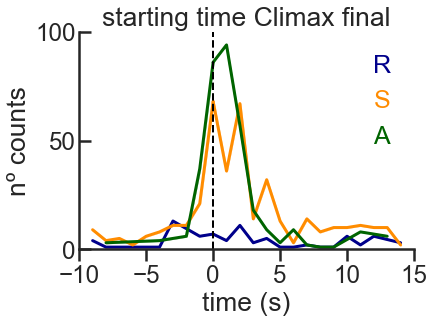

In [25]:
r_pre=df.loc[(df['next_event']=='Climax final') & (df['event']=='R') & (df['anticip_time']>-10)]
r_pre['val']=1
r_post=df.loc[(df['previous_event']=='Climax final') & (df['event']=='R') & (df['RT']<15)]
r_post['val']=1

s_pre=df.loc[(df['next_event']=='Climax final') & (df['event']=='S') & (df['anticip_time']>-10)]
s_pre['val']=1
s_post=df.loc[(df['previous_event']=='Climax final') & (df['event']=='S') & (df['RT']<15)]
s_post['val']=1

a_pre = df.loc[(df['next_event']=='Climax final') & ((df['event']=='A')  | (df['event']=='a') |
                                   (df['event']=='AA') | (df['event']=='A+') |
                                   (df['event']=='AA+') | (df['event']=='a+')  )& (df['anticip_time']>-10)]
a_pre['val'] = 1
a_post = df.loc[(df['previous_event']=='Climax final') & ((df['event']=='A')  | (df['event']=='a') |
                                   (df['event']=='AA') | (df['event']=='A+') |
                                   (df['event']=='AA+') | (df['event']=='a+')  )& (df['RT']<15)]
a_post['val'] = 1

##########

sns.lineplot('anticip_time', 'val', estimator=np.sum, data=r_pre, color='darkblue')
sns.lineplot('RT', 'val', estimator=np.sum, data=r_post, label='R', color='darkblue')

sns.lineplot('anticip_time', 'val', estimator=np.sum, data=s_pre, color='darkorange')
sns.lineplot('RT', 'val', estimator=np.sum, data=s_post, label='S', color='darkorange')

sns.lineplot('anticip_time', 'val', estimator=np.sum, data=a_pre, color='darkgreen')
sns.lineplot('RT', 'val', estimator=np.sum, data=a_post, label='S', color='darkgreen')

plt.plot([0,0], [0,350], '--k', linewidth=2)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)  
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params('y', direction='in') #direction
plt.gca().tick_params('x', direction='out') #direction
plt.xlim(-10,15)
plt.xticks([-10, -5, 0, 5, 10, 15])
plt.ylim(0,100)
plt.yticks([0, 50, 100])
plt.ylabel('nº counts')
plt.xlabel('time (s)')
plt.title('starting time Climax final')

hue_order=['R', 'S', 'A']
palette=['darkblue', 'darkorange', 'darkgreen']
l = plt.legend(loc=1, frameon=False, prop={'size': 25})
for i_h, h_idx in enumerate(hue_order):
    l.get_texts()[i_h].set_text(h_idx)
    l.legendHandles[i_h].set_visible(False);
    l.get_texts()[i_h].set_color(palette[i_h]);

### Dynamics after 

In [20]:
EVENT =  'Climax final' #'gag' 'Miniclimax'

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


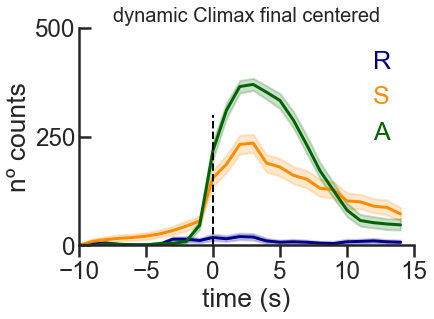

In [21]:
R_dynamic_post = []
t_post=15

R_events_post =df.loc[(df['previous_event']==EVENT) & (df['event']=='R') & (df['RT']<t_post)]

for i in range(len(R_events_post)):
    action = np.zeros(t_post) ## 0, in the event time, we will put a 1
    times_=np.arange(0, t_post) ##times (RT always posive)
    ##
    strt = R_events_post.iloc[i].RT ##starting time after 0
    end_durat = R_events_post.iloc[i].RT + R_events_post.iloc[i].duration ## final time after 0 
    ##
    if end_durat < t_post:                              #not very long duration
        range_action = list(np.arange(strt, end_durat))
    else:                                               #longer duration than the t_post (used for the graph)
        range_action = list(np.arange(strt, t_post))
    ###
    for x in range_action:    ## change the 0 in the xs for 1 when necessary
        action[x]=1
    ##
    ## dataframe with the time dynamix of the event
    event_x = pd.DataFrame({'times_centered': times_, 'action': action})
    event_x['magician_event'] = R_events_post.iloc[i].previous_event  
    event_x['subject'] = R_events_post.iloc[i].subject 
    event_x['trick'] = R_events_post.iloc[i].trick 
    event_x['reaction'] = R_events_post.iloc[i].event 
    #
    R_dynamic_post.append(event_x)
    
    
####
R_dynamic_post = pd.concat(R_dynamic_post)



R_dynamic_pre = []
t_pre = -10
t_post

R_events_pre = df.loc[(df['next_event']==EVENT) & (df['event']=='R') & (df['anticip_time']>t_pre)]

for i in range(len(R_events_pre)):
    action = np.zeros(t_post - t_pre ) ## the sum of both
    times_=np.arange(t_pre, t_post) ##times (RT always posive)
    ##
    strt = R_events_pre.iloc[i].anticip_time ##starting time after 0
    end_durat = R_events_pre.iloc[i].anticip_time + R_events_pre.iloc[i].duration ## final time after 0 
    ##
    if end_durat < t_post:                              #not very long duration
        range_action = list(np.arange(strt, end_durat))
    else:                                               #longer duration than the t_post (used for the graph)
        range_action = list(np.arange(strt, t_post))
    ###
    range_action= [range_action[i_x] - t_pre for i_x in range(len(range_action))] ## just in the case of pre
    for x in range_action:    ## change the 0 in the xs for 1 when necessary
        action[x]=1
    ##
    ## dataframe with the time dynamix of the event
    event_x = pd.DataFrame({'times_centered': times_, 'action': action})
    event_x['magician_event'] = R_events_pre.iloc[i].next_event  
    event_x['subject'] = R_events_pre.iloc[i].subject 
    event_x['trick'] = R_events_pre.iloc[i].trick 
    event_x['reaction'] = R_events_pre.iloc[i].event 
    #
    R_dynamic_pre.append(event_x)
    
    
####
R_dynamic_pre = pd.concat(R_dynamic_pre)


R_dynamic=pd.concat([R_dynamic_pre, R_dynamic_post])
R_dynamic.head()

######################################################################

A_dynamic_post = []
t_post=15

A_events_post =df.loc[(df['previous_event']==EVENT) & ((df['event']=='A')  | (df['event']=='a') |
                                   (df['event']=='AA') | (df['event']=='A+') |
                                   (df['event']=='AA+') | (df['event']=='a+')  ) & (df['RT']<t_post)]

for i in range(len(A_events_post)):
    action = np.zeros(t_post) ## 0, in the event time, we will put a 1
    times_=np.arange(0, t_post) ##times (RT always posive)
    ##
    strt = A_events_post.iloc[i].RT ##starting time after 0
    end_durat = A_events_post.iloc[i].RT + A_events_post.iloc[i].duration ## final time after 0 
    ##
    if end_durat < t_post:                              #not very long duration
        range_action = list(np.arange(strt, end_durat))
    else:                                               #longer duration than the t_post (used for the graph)
        range_action = list(np.arange(strt, t_post))
    ###
    for x in range_action:    ## change the 0 in the xs for 1 when necessary
        action[x]=1
    ##
    ## dataframe with the time dynamix of the event
    event_x = pd.DataFrame({'times_centered': times_, 'action': action})
    event_x['magician_event'] = A_events_post.iloc[i].previous_event  
    event_x['subject'] = A_events_post.iloc[i].subject 
    event_x['trick'] = A_events_post.iloc[i].trick 
    event_x['reaction'] = A_events_post.iloc[i].event 
    #
    A_dynamic_post.append(event_x)
    
    
####
A_dynamic_post = pd.concat(A_dynamic_post)



A_dynamic_pre = []
t_pre = -10
t_post

A_events_pre = df.loc[(df['next_event']==EVENT) & ((df['event']=='A')  | (df['event']=='a') |
                                   (df['event']=='AA') | (df['event']=='A+') |
                                   (df['event']=='AA+') | (df['event']=='a+')  ) & (df['anticip_time']>t_pre)]

for i in range(len(A_events_pre)):
    action = np.zeros(t_post - t_pre ) ## the sum of both
    times_=np.arange(t_pre, t_post) ##times (RT always posive)
    ##
    strt = A_events_pre.iloc[i].anticip_time ##starting time after 0
    end_durat = A_events_pre.iloc[i].anticip_time + A_events_pre.iloc[i].duration ## final time after 0 
    ##
    if end_durat < t_post:                              #not very long duration
        range_action = list(np.arange(strt, end_durat))
    else:                                               #longer duration than the t_post (used for the graph)
        range_action = list(np.arange(strt, t_post))
    ###
    range_action= [range_action[i_x] - t_pre for i_x in range(len(range_action))] ## just in the case of pre
    for x in range_action:    ## change the 0 in the xs for 1 when necessary
        action[x]=1
    ##
    ## dataframe with the time dynamix of the event
    event_x = pd.DataFrame({'times_centered': times_, 'action': action})
    event_x['magician_event'] = A_events_pre.iloc[i].next_event  
    event_x['subject'] = A_events_pre.iloc[i].subject 
    event_x['trick'] = A_events_pre.iloc[i].trick 
    event_x['reaction'] = A_events_pre.iloc[i].event 
    #
    A_dynamic_pre.append(event_x)
    
    
####
A_dynamic_pre = pd.concat(A_dynamic_pre)


A_dynamic=pd.concat([A_dynamic_pre, A_dynamic_post])
A_dynamic.head()

##################################################################

S_dynamic_post = []
t_post=15

S_events_post =df.loc[(df['previous_event']==EVENT) & (df['event']=='S') & (df['RT']<t_post)]

for i in range(len(S_events_post)):
    action = np.zeros(t_post) ## 0, in the event time, we will put a 1
    times_=np.arange(0, t_post) ##times (RT always posive)
    ##
    strt = S_events_post.iloc[i].RT ##starting time after 0
    end_durat = S_events_post.iloc[i].RT + S_events_post.iloc[i].duration ## final time after 0 
    ##
    if end_durat < t_post:                              #not very long duration
        range_action = list(np.arange(strt, end_durat))
    else:                                               #longer duration than the t_post (used for the graph)
        range_action = list(np.arange(strt, t_post))
    ###
    for x in range_action:    ## change the 0 in the xs for 1 when necessary
        action[x]=1
    ##
    ## dataframe with the time dynamix of the event
    event_x = pd.DataFrame({'times_centered': times_, 'action': action})
    event_x['magician_event'] = S_events_post.iloc[i].previous_event  
    event_x['subject'] = S_events_post.iloc[i].subject 
    event_x['trick'] = S_events_post.iloc[i].trick 
    event_x['reaction'] = S_events_post.iloc[i].event 
    #
    S_dynamic_post.append(event_x)
    
    
####
S_dynamic_post = pd.concat(S_dynamic_post)



S_dynamic_pre = []
t_pre = -10
t_post

S_events_pre = df.loc[(df['next_event']==EVENT) & (df['event']=='S') & (df['anticip_time']>t_pre)]

for i in range(len(S_events_pre)):
    action = np.zeros(t_post - t_pre ) ## the sum of both
    times_=np.arange(t_pre, t_post) ##times (RT always posive)
    ##
    strt = S_events_pre.iloc[i].anticip_time ##starting time after 0
    end_durat = S_events_pre.iloc[i].anticip_time + S_events_pre.iloc[i].duration ## final time after 0 
    ##
    if end_durat < t_post:                              #not very long duration
        range_action = list(np.arange(strt, end_durat))
    else:                                               #longer duration than the t_post (used for the graph)
        range_action = list(np.arange(strt, t_post))
    ###
    range_action= [range_action[i_x] - t_pre for i_x in range(len(range_action))] ## just in the case of pre
    for x in range_action:    ## change the 0 in the xs for 1 when necessary
        action[x]=1
    ##
    ## dataframe with the time dynamix of the event
    event_x = pd.DataFrame({'times_centered': times_, 'action': action})
    event_x['magician_event'] = S_events_pre.iloc[i].next_event  
    event_x['subject'] = S_events_pre.iloc[i].subject 
    event_x['trick'] = S_events_pre.iloc[i].trick 
    event_x['reaction'] = S_events_pre.iloc[i].event 
    #
    S_dynamic_pre.append(event_x)
    
    
####
S_dynamic_pre = pd.concat(S_dynamic_pre)


S_dynamic=pd.concat([S_dynamic_pre, S_dynamic_post])
S_dynamic.head()


##################################################################################

sns.lineplot('times_centered', 'action', estimator=np.sum, data=R_dynamic, color='darkblue', label='R')
sns.lineplot('times_centered', 'action', estimator=np.sum, data=S_dynamic, color='darkorange', label='S')
sns.lineplot('times_centered', 'action', estimator=np.sum, data=A_dynamic, color='darkgreen', label='A')

plt.plot([0,0], [0,300], '--k', linewidth=2)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)  
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params('y', direction='in') #direction
plt.gca().tick_params('x', direction='out') #direction
plt.xlim(-10,15)
plt.xticks([-10, -5, 0, 5, 10, 15])
plt.ylim(0, 500)
plt.yticks([0,  250, 500])
plt.ylabel('nº counts')
plt.xlabel('time (s)')
plt.title('dynamic ' + EVENT + ' centered', fontsize=20)

hue_order=['R', 'S', 'A']
palette=['darkblue', 'darkorange', 'darkgreen']
l = plt.legend(loc=1, frameon=False, prop={'size': 25})
for i_h, h_idx in enumerate(hue_order):
    l.get_texts()[i_h].set_text(h_idx)
    l.legendHandles[i_h].set_visible(False);
    l.get_texts()[i_h].set_color(palette[i_h]);


### Loop dynamics

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


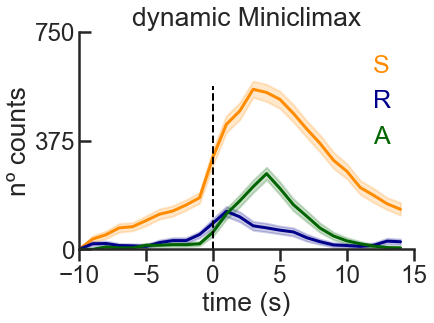

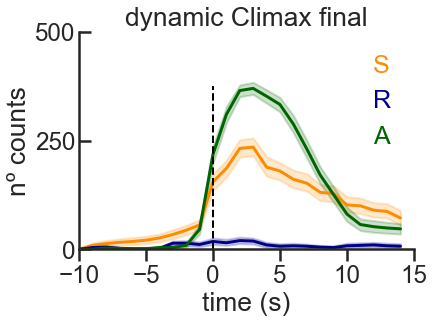

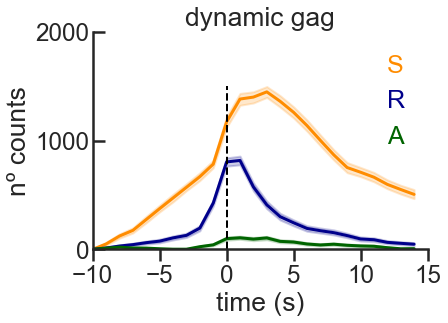

In [17]:
EVENTs = ['Miniclimax','Climax final', 'gag']

df_s = df.loc[df['event']=='S']
df_r = df.loc[df['event']=='R']
df_a = df.loc[((df['event']=='A')  | (df['event']=='a') | (df['event']=='AA') | (df['event']=='A+') | (df['event']=='AA+') | (df['event']=='a+')) ]


dfs_responses = [df_s, df_r, df_a]
labels_responses = ['S', 'R', 'A']
colors_ = ['darkorange', 'darkblue', 'darkgreen']


for EVENT in EVENTs:
    plt.figure()
    for indx, dfx  in enumerate(dfs_responses):
        dynamic_post = []
        t_post=15

        events_post =dfx.loc[(dfx['previous_event']==EVENT) & (dfx['RT']<t_post)]

        for i in range(len(events_post)):
            action = np.zeros(t_post) ## 0, in the event time, we will put a 1
            times_=np.arange(0, t_post) ##times (RT always posive)
            ##
            strt = events_post.iloc[i].RT ##starting time after 0
            end_durat = events_post.iloc[i].RT + events_post.iloc[i].duration ## final time after 0 
            ##
            if end_durat < t_post:                              #not very long duration
                range_action = list(np.arange(strt, end_durat))
            else:                                               #longer duration than the t_post (used for the graph)
                range_action = list(np.arange(strt, t_post))
            ###
            for x in range_action:    ## change the 0 in the xs for 1 when necessary
                action[x]=1
            ##
            ## dataframe with the time dynamix of the event
            event_x = pd.DataFrame({'times_centered': times_, 'action': action})
            event_x['magician_event'] = events_post.iloc[i].previous_event  
            event_x['subject'] = events_post.iloc[i].subject 
            event_x['trick'] = events_post.iloc[i].trick 
            event_x['reaction'] = EVENT 
            #
            dynamic_post.append(event_x)


        ####
        dynamic_post = pd.concat(dynamic_post)
        ###
        ###
        dynamic_pre = []
        t_pre = -10
        t_post

        events_pre = dfx.loc[(dfx['next_event']==EVENT) & (dfx['anticip_time']>t_pre)]

        for i in range(len(events_pre)):
            action = np.zeros(t_post - t_pre ) ## the sum of both
            times_=np.arange(t_pre, t_post) ##times (RT always posive)
            ##
            strt = events_pre.iloc[i].anticip_time ##starting time after 0
            end_durat = events_pre.iloc[i].anticip_time + events_pre.iloc[i].duration ## final time after 0 
            ##
            if end_durat < t_post:                              #not very long duration
                range_action = list(np.arange(strt, end_durat))
            else:                                               #longer duration than the t_post (used for the graph)
                range_action = list(np.arange(strt, t_post))
            ###
            range_action= [range_action[i_x] - t_pre for i_x in range(len(range_action))] ## just in the case of pre
            for x in range_action:    ## change the 0 in the xs for 1 when necessary
                action[x]=1
            ##
            ## dataframe with the time dynamix of the event
            event_x = pd.DataFrame({'times_centered': times_, 'action': action})
            event_x['magician_event'] = events_pre.iloc[i].next_event  
            event_x['subject'] = events_pre.iloc[i].subject 
            event_x['trick'] = events_pre.iloc[i].trick 
            event_x['reaction'] = EVENT 
            #
            dynamic_pre.append(event_x)


        ####
        dynamic_pre = pd.concat(dynamic_pre)
        ###
        ###
        dynamic=pd.concat([dynamic_post, dynamic_pre])
        
        sns.lineplot('times_centered', 'action', estimator=np.sum, data=dynamic, color=colors_[indx], label=labels_responses[indx])
    ##
    ###
    if EVENT =='gag':
        ylim = 2000
    elif EVENT == 'Miniclimax':
        ylim = 750
    elif EVENT == 'Climax final':
        ylim=500
    
    plt.plot([0,0], [0, ylim-0.25*ylim], '--k', linewidth=2)
    plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
    plt.gca().spines['top'].set_visible(False)  
    plt.gca().get_yaxis().tick_left()
    plt.gca().tick_params('y', direction='in') #direction
    plt.gca().tick_params('x', direction='out') #direction
    plt.xlim(-10,15)
    plt.xticks([-10, -5, 0, 5, 10, 15])
    plt.ylim(0, ylim)
    plt.yticks([0,  ylim/2, ylim])
    plt.ylabel('nº counts')
    plt.xlabel('time (s)')
    plt.title('dynamic ' + EVENT)
    #
    l = plt.legend(loc=1, frameon=False, prop={'size': 25})
    for i_h, h_idx in enumerate(labels_responses):
        l.get_texts()[i_h].set_text(h_idx)
        l.legendHandles[i_h].set_visible(False);
        l.get_texts()[i_h].set_color(colors_[i_h]);
    ##
    plt.show()




## Correlation con memory con aplauso tras clímax final

In [34]:
times_strat_trick = df_gea.loc[df_gea['evento']=='inicio'].times_s.values

trick_ = []
for i in range(len(df)):
    t_ev = df.iloc[i].time_s
    if t_ev<=times_strat_trick[0]:
        trick_.append(0)
    elif t_ev<=times_strat_trick[1]:
        trick_.append(1)
    elif t_ev<=times_strat_trick[2]:
        trick_.append(2)
    elif t_ev<=times_strat_trick[3]:
        trick_.append(3)
    elif t_ev<=times_strat_trick[4]:
        trick_.append(4)
    elif t_ev<=times_strat_trick[5]:
        trick_.append(5)        
    elif t_ev<=times_strat_trick[6]:
        trick_.append(6)
    elif t_ev<=times_strat_trick[7]:
        trick_.append(7)
    elif t_ev>times_strat_trick[7]:
        trick_.append(8)

### 
df['trick_'] = trick_

In [35]:
results_mem=[]

COND_EV = ((df['event']=='S') | (df['event']=='R'))
COND_EV = ((df['event']=='S') | (df['event']=='R'))
#COND_EV = ((df['event']=='A')  | (df['event']=='a') | (df['event']=='AA') | (df['event']=='A+') | (df['event']=='AA+') | (df['event']=='a+')) 

for Subject in df.subject.unique():
    for trick in [1,2,3,4,5,6,7,8]:
        ####
        df_e = df.loc[(df['previous_event']=='Climax final') & (df['RT']<10) 
               & (df['subject']==Subject)  & (df['trick_']==trick)  & COND_EV  ]

        if len(df_e) == 0:
            duration_ = 0
        else:
            duration_ = df_e.duration.sum()

        #####
        r1 = df.loc[(df['subject']==Subject)  & (df['trick']==trick)   ].r1.iloc[0]
        r2 = df.loc[(df['subject']==Subject)  & (df['trick']==trick)   ].r2.iloc[0]
        r3 = df.loc[(df['subject']==Subject)  & (df['trick']==trick)   ].r3.iloc[0]
        r4 = df.loc[(df['subject']==Subject)  & (df['trick']==trick)   ].r4.iloc[0]
        #####
        res_m = pd.DataFrame(np.array([[Subject, trick, duration_, r1, 0],
                           [Subject, trick, duration_, r2,10],
                           [Subject, trick, duration_, r3,45],
                           [Subject, trick, duration_, r4,135]]) )
        results_mem.append(res_m)
        

In [36]:
results_mem_S = pd.concat(results_mem)
results_mem_S.columns=['subject', 'trick', 'duration', 'memory', 'time']
results_mem_S = results_mem_S.loc[results_mem_S['memory']!='Miss']
results_mem_S['memory'] = results_mem_S['memory'].replace(['0', '1'], [0,1])
results_mem_S.head()
###results_mem_S.to_csv("memory_S.csv")
results_mem_S_T1= results_mem_S.loc[results_mem_S['time']==0]
results_mem_S_T1.to_csv("memory_S_T1.csv")

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


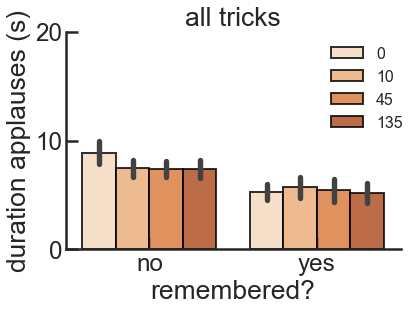

                            OLS Regression Results                            
Dep. Variable:               duration   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.3012
Date:                Sun, 21 Feb 2021   Prob (F-statistic):              0.583
Time:                        10:30:19   Log-Likelihood:                -1562.0
No. Observations:                 465   AIC:                             3128.
Df Residuals:                     463   BIC:                             3136.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.9417      0.383     12.917      0.0

In [22]:
plt.figure()
sns.barplot(x="memory", y="duration", hue='time', hue_order=[0,10,45,135],
                data=results_mem_S, estimator=np.mean, 
                  ci=68, palette='Oranges', edgecolor='black', ecolor='k', alpha=0.8)

plt.gca().set_xlabel('remembered?')
plt.gca().set_ylabel('duration applauses (s)')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().tick_params(direction='in') #direction
plt.gca().set_ylim(0,20)
plt.gca().set_yticks([0, 10,20])
plt.gca().tick_params(direction='in') #direction
plt.gca().set_xticklabels(['no', 'yes'])

plt.gca().set_title('all tricks')

h, l = plt.gca().get_legend_handles_labels()
labels=['0', '10', '45', '135']
plt.gca().legend(h, labels, title="", frameon=False, prop={'size': 16}, bbox_to_anchor=(1.05, 1))

plt.show()

#####
Tx= results_mem_S
Tx['subject'] = pd.to_numeric(Tx['subject'])
Tx['memory'] = pd.to_numeric(Tx['memory'])
Tx['duration'] = pd.to_numeric(Tx['duration'])
Tx['time'] = pd.to_numeric(Tx['time'])
##
r = smf.ols(formula='duration~time', data=Tx.loc[Tx['memory']==1]).fit()
print(r.summary())

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


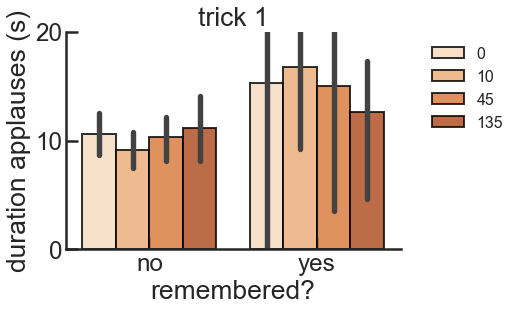

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

                            OLS Regression Results                            
Dep. Variable:               duration   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.071
Method:                 Least Squares   F-statistic:                   0.07495
Date:                Sun, 21 Feb 2021   Prob (F-statistic):              0.789
Time:                        10:30:20   Log-Likelihood:                -64.221
No. Observations:                  15   AIC:                             132.4
Df Residuals:                      13   BIC:                             133.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.3423      6.401      2.553      0.0

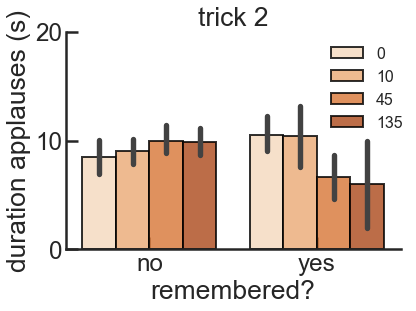

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:               duration   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     1.614
Date:                Sun, 21 Feb 2021   Prob (F-statistic):              0.222
Time:                        10:30:21   Log-Likelihood:                -54.666
No. Observations:                  18   AIC:                             113.3
Df Residuals:                      16   BIC:                             115.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3009      1.473      6.993      0.0

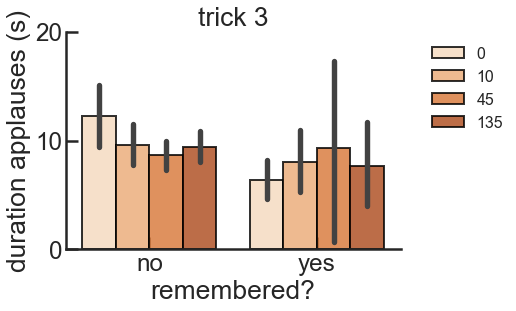

                            OLS Regression Results                            
Dep. Variable:               duration   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.038
Method:                 Least Squares   F-statistic:                   0.03626
Date:                Sun, 21 Feb 2021   Prob (F-statistic):              0.851
Time:                        10:30:22   Log-Likelihood:                -94.536
No. Observations:                  27   AIC:                             193.1
Df Residuals:                      25   BIC:                             195.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.2647      1.968      3.692      0.0

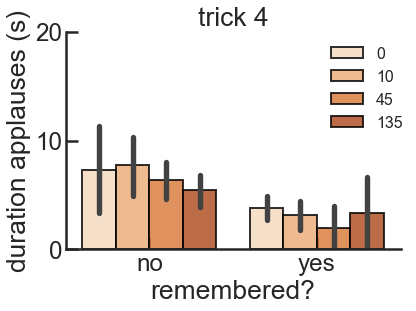

                            OLS Regression Results                            
Dep. Variable:               duration   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.034
Method:                 Least Squares   F-statistic:                   0.07669
Date:                Sun, 21 Feb 2021   Prob (F-statistic):              0.784
Time:                        10:30:23   Log-Likelihood:                -80.909
No. Observations:                  29   AIC:                             165.8
Df Residuals:                      27   BIC:                             168.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3721      0.893      3.776      0.0

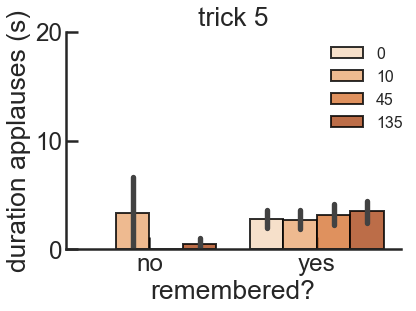

                            OLS Regression Results                            
Dep. Variable:               duration   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.4386
Date:                Sun, 21 Feb 2021   Prob (F-statistic):              0.510
Time:                        10:30:24   Log-Likelihood:                -156.07
No. Observations:                  59   AIC:                             316.1
Df Residuals:                      57   BIC:                             320.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7982      0.591      4.734      0.0

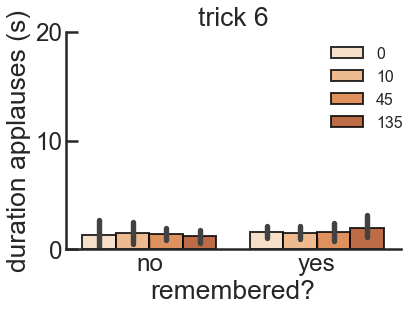

                            OLS Regression Results                            
Dep. Variable:               duration   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                    0.1628
Date:                Sun, 21 Feb 2021   Prob (F-statistic):              0.689
Time:                        10:30:24   Log-Likelihood:                -101.95
No. Observations:                  44   AIC:                             207.9
Df Residuals:                      42   BIC:                             211.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5231      0.471      3.231      0.0

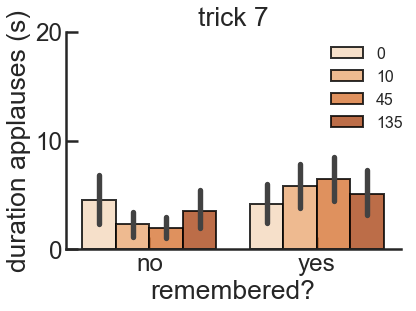

                            OLS Regression Results                            
Dep. Variable:               duration   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.028
Method:                 Least Squares   F-statistic:                  0.006746
Date:                Sun, 21 Feb 2021   Prob (F-statistic):              0.935
Time:                        10:30:25   Log-Likelihood:                -122.45
No. Observations:                  38   AIC:                             248.9
Df Residuals:                      36   BIC:                             252.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.2970      1.334      3.970      0.0

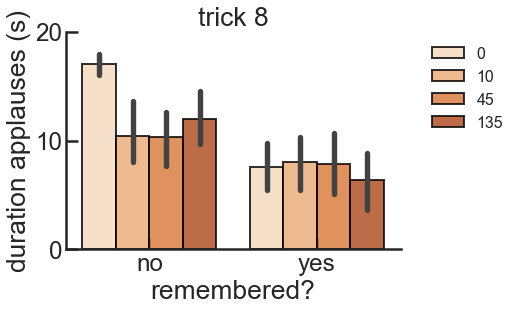

                            OLS Regression Results                            
Dep. Variable:               duration   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                    0.1723
Date:                Sun, 21 Feb 2021   Prob (F-statistic):              0.680
Time:                        10:30:26   Log-Likelihood:                -170.52
No. Observations:                  48   AIC:                             345.0
Df Residuals:                      46   BIC:                             348.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.9142      1.596      4.960      0.0

In [23]:
for trick in [1,2,3,4,5,6,7,8]:
    plt.figure()
    sns.barplot(x="memory", y="duration", hue='time', hue_order=[0,10,45,135],
                    data=results_mem_S.loc[results_mem_S['trick']==trick], estimator=np.mean, 
                      ci=68, palette='Oranges', edgecolor='black', ecolor='k', alpha=0.8)

    plt.gca().set_xlabel('remembered?')
    plt.gca().set_ylabel('duration applauses (s)')
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().tick_params(direction='in') #direction
    plt.gca().set_ylim(0,20)
    plt.gca().set_yticks([0, 10,20])
    plt.gca().tick_params(direction='in') #direction
    plt.gca().set_xticklabels(['no', 'yes'])

    plt.gca().set_title('trick ' + str(trick))

    h, l = plt.gca().get_legend_handles_labels()
    labels=['0', '10', '45', '135']
    plt.gca().legend(h, labels, title="", frameon=False, prop={'size': 16}, bbox_to_anchor=(1.05, 1))
    
    plt.show()
    
    #####
    Tx= results_mem_S.loc[results_mem_S['trick']==trick]
    Tx['subject'] = pd.to_numeric(Tx['subject'])
    Tx['memory'] = pd.to_numeric(Tx['memory'])
    Tx['duration'] = pd.to_numeric(Tx['duration'])
    Tx['time'] = pd.to_numeric(Tx['time'])
    ##
    r = smf.ols(formula='duration~time', data=Tx.loc[Tx['memory']==1]).fit()
    print(r.summary())
    #r = smf.mixedlm(formula='memory~time*duration', data=Tx, groups=Tx['subject']).fit()
    #print(r.summary())
    



## Variability of events

In [148]:
df['event2']=df['event'].copy()
df['event2']=df['event2'].replace(['A', 'A+', 'a', 'aa', 'AA', 'AA+', 'a+'], ['A', 'A', 'A', 'A', 'A', 'A', 'A'])

In [149]:
df['count']=1

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Responses to mini climax')

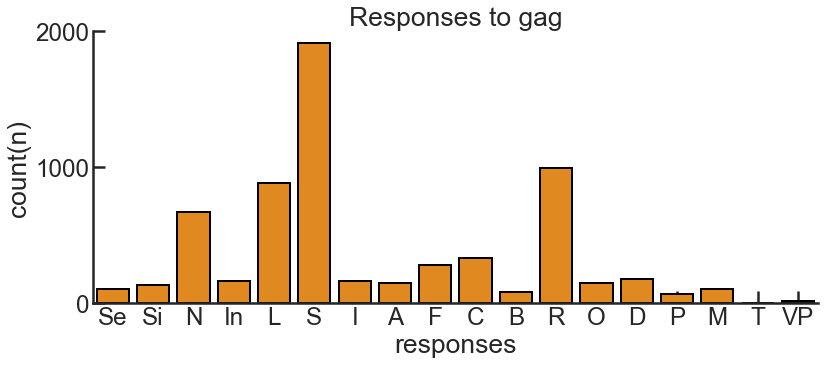

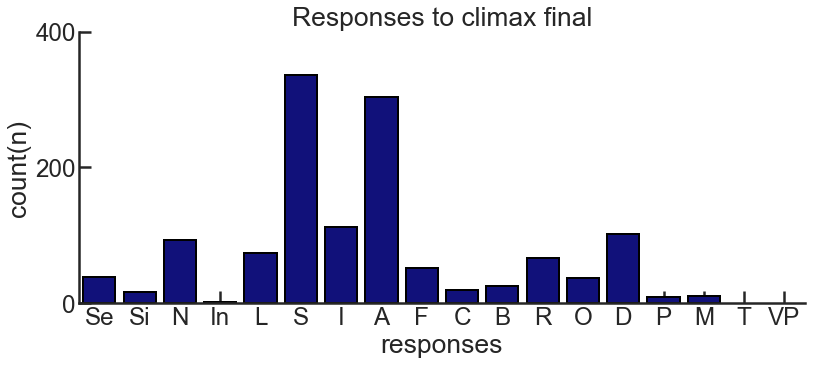

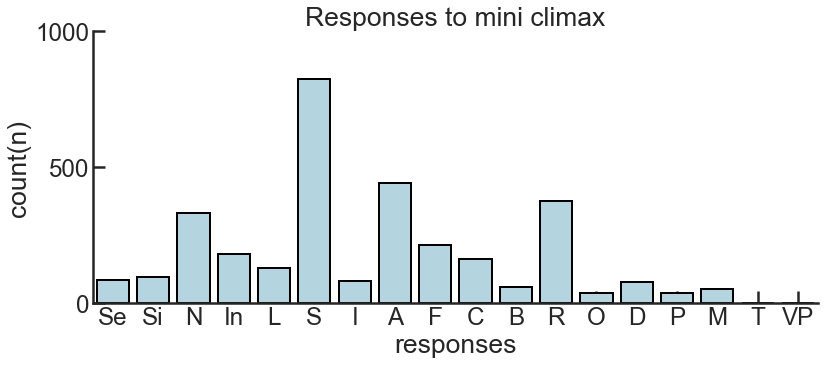

In [150]:
plt.figure(figsize=(13,5))

sns.barplot(x='event2', y='count', order=df.event2.unique(),
                data=df.loc[ (df['previous_event']=='gag') ], estimator=np.sum, 
                  ci=0, color='darkorange', edgecolor='black', ecolor='k', alpha=1.0)


plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
#plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('counts/subject')
#plt.gca().set_ylim(0,40)
#plt.gca().set_yticks([0,20,40])
plt.title('prev event: GAG');
plt.gca().set_xlabel('responses')
plt.gca().set_ylabel('count(n)')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().tick_params(direction='in') #direction
plt.gca().set_ylim(0,2000)
plt.gca().set_yticks([0, 1000,2000])
plt.gca().tick_params(direction='in') #direction

plt.gca().set_title('Responses to gag')


##########################################
##########################################


plt.figure(figsize=(13,5))

sns.barplot(x='event2', y='count', order=df.event2.unique(),
                data=df.loc[ (df['previous_event']=='Climax final') ], estimator=np.sum, 
                  ci=0, color='darkblue', edgecolor='black', ecolor='k', alpha=1.0)


plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
#plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('counts/subject')
#plt.gca().set_ylim(0,40)
#plt.gca().set_yticks([0,20,40])
plt.title('prev event: GAG');
plt.gca().set_xlabel('responses')
plt.gca().set_ylabel('count(n)')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().tick_params(direction='in') #direction
plt.gca().set_ylim(0,400)
plt.gca().set_yticks([0, 200, 400])
plt.gca().tick_params(direction='in') #direction

plt.gca().set_title('Responses to climax final')





##########################################
##########################################


plt.figure(figsize=(13,5))

sns.barplot(x='event2', y='count', order=df.event2.unique(),
                data=df.loc[ (df['previous_event']=='Miniclimax') ], estimator=np.sum, 
                  ci=0, color='lightblue', edgecolor='black', ecolor='k', alpha=1.0)


plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
#plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('counts/subject')
#plt.gca().set_ylim(0,40)
#plt.gca().set_yticks([0,20,40])
plt.title('prev event: GAG');
plt.gca().set_xlabel('responses')
plt.gca().set_ylabel('count(n)')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().tick_params(direction='in') #direction
plt.gca().set_ylim(0,1000)
plt.gca().set_yticks([0, 500, 1000])
plt.gca().tick_params(direction='in') #direction

plt.gca().set_title('Responses to mini climax')

In [152]:
df_gags=df.loc[df['previous_event']=='gag']
df_climaxfinal=df.loc[df['previous_event']=='Climax final' ]



frames=[]

for S in df_gags.subject.unique():
    df_s=df_gags.loc[df_gags['subject']==S]
    L = df_s.groupby(['event2']).sum()
    LL=L['duration']
    df_count = pd.DataFrame({'events': LL.index, 'durations': LL.values})
    df_count['subject']= S
    df_count['previous_event']='gag'
    #df_count = df_s.groupby(['event']).size().reset_index(name='count')
    #df_count['subject']= S
    #df_count['previous_event']='gag'
    frames.append(df_count)


for S in df_climaxfinal.subject.unique():
    df_s=df_climaxfinal.loc[df_climaxfinal['subject']==S]
    L = df_s.groupby(['event2']).sum()
    LL=L['duration']
    df_count = pd.DataFrame({'events': LL.index, 'durations': LL.values})
    df_count['subject']= S
    df_count['previous_event']='Climax final'
    #df_count = df_s.groupby(['event']).size().reset_index(name='count')
    #df_count['subject']= S
    #df_count['previous_event']='gag'
    frames.append(df_count)

    
    
df_ = pd.concat(frames)

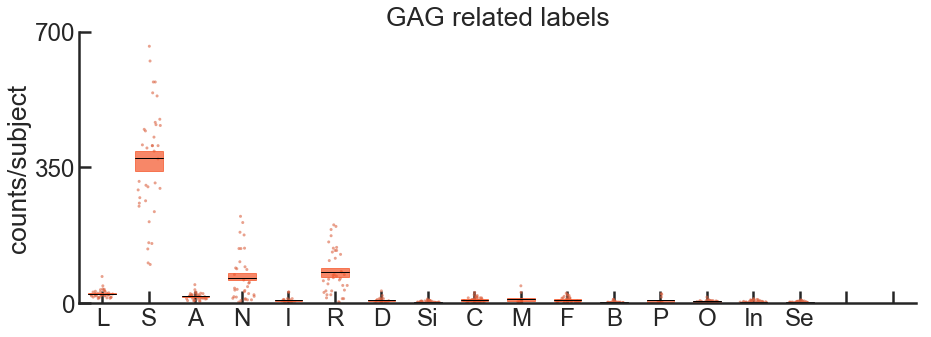

In [164]:
plt.figure(figsize=(15,5))

linares_plot(x='events', y='durations', order=df_climaxfinal.event2.unique(), 
            df=df_.loc[ (df_['previous_event']=='gag') ] , 
            palette=['#f55528'], CI=0.68,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=10, alpha_box=0.7, alpha=0.6,  point_size=3, leg=True, sep_axis=False)

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.ylabel('counts/subject')
plt.gca().set_ylim(0,700)
plt.gca().set_yticks([0,350,700])
plt.title('GAG related labels');

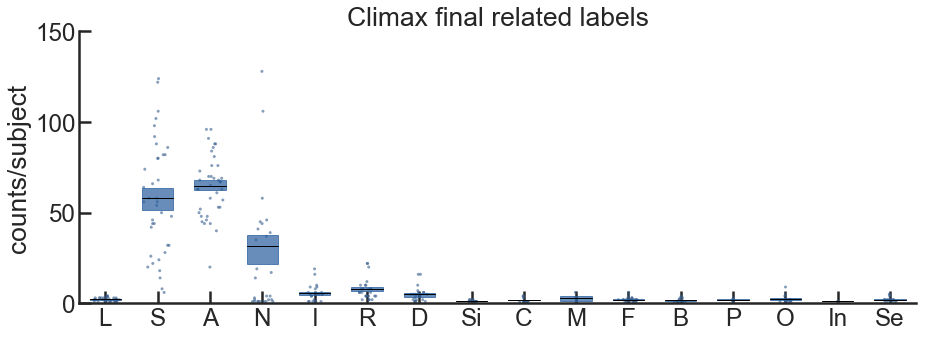

In [163]:
plt.figure(figsize=(15,5))

linares_plot(x='events', y='durations', order=df_climaxfinal.event2.unique(), 
            df=df_.loc[ (df_['previous_event']=='Climax final') ] , 
            palette=['#285d9d'], CI=0.68,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=10, alpha_box=0.7, alpha=0.6,  point_size=3, leg=True, sep_axis=False)

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.ylabel('counts/subject')
plt.gca().set_ylim(0,150)
plt.gca().set_yticks([0,50,100,150])
plt.title('Climax final related labels');

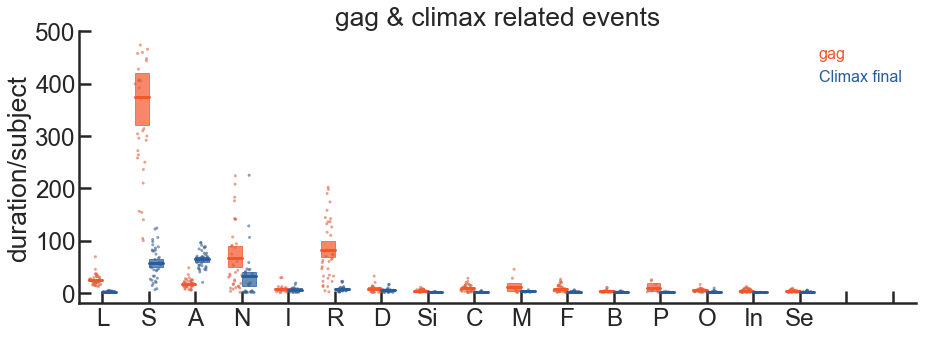

In [162]:
plt.figure(figsize=(15,5))

linares_plot(x='events', y='durations', order=df_climaxfinal.event2.unique(), hue='previous_event',
             hue_order=['gag', 'Climax final'],
            df=df_, 
            palette=['#f55528', '#285d9d'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=10, alpha_box=0.7, alpha=0.6,  point_size=3, leg=True, sep_axis=False)

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.ylabel('duration/subject')
plt.gca().set_ylim(-20, 500)
plt.gca().set_yticks([0,100,200,300,400,500])
plt.title('gag & climax related events');

In [66]:
df['duration'] = pd.to_numeric(df['duration'])

In [73]:
df_count = df_s.groupby(['event']).size().reset_index(name='count')
df_count

,event,count
0,A,4
1,AA,1
2,D,5
3,L,1
4,N,7
5,O,2
6,S,5
7,Se,2
8,a,5


In [84]:
a = df_s.groupby(['event'])
a = a.describe()['duration']
a

,count,mean,std,min,25%,50%,75%,max
event,,,,,,,,
A,4.0,7.750000,1.892969,5.0,7.25,8.5,9.0,9.0
AA,1.0,11.000000,NaN,11.0,11.00,11.0,11.0,11.0
D,5.0,1.000000,0.000000,1.0,1.00,1.0,1.0,1.0
L,1.0,1.000000,NaN,1.0,1.00,1.0,1.0,1.0
N,7.0,6.571429,14.740614,1.0,1.00,1.0,1.0,40.0
O,2.0,1.000000,0.000000,1.0,1.00,1.0,1.0,1.0
S,5.0,6.400000,3.577709,4.0,4.00,4.0,8.0,12.0
Se,2.0,1.000000,0.000000,1.0,1.00,1.0,1.0,1.0
a,5.0,3.800000,0.447214,3.0,4.00,4.0,4.0,4.0


In [89]:
a['mean'].values()

TypeError: 'numpy.ndarray' object is not callable

In [72]:
df_s.loc[df_s['event']=='A']

,duration,event,subject,tiempo,time_s,trick,RT,previous_event,anticip_time,next_event,r1,r2,r3,r4,count
11441,5,A,38,00:06:20,380,1,2,Climax final,-12,gag,0,Miss,Miss,Miss,1
11517,9,A,38,00:16:10,970,4,1,Climax final,-13,inicio,1,Miss,Miss,Miss,1
11643,9,A,38,00:34:30,2070,7,3,Climax final,-15,gag,1,Miss,Miss,Miss,1
11682,8,A,38,00:41:20,2480,8,1,Climax final,1,None,1,Miss,Miss,Miss,1


In [90]:
df_s=df_s[['event', 'duration']]
df_s.groupby(['event']).size().reset_index(name='duration')

,event,duration
0,A,4
1,AA,1
2,D,5
3,L,1
4,N,7
5,O,2
6,S,5
7,Se,2
8,a,5


In [115]:
L = df_s.groupby(['event']).describe()
L['duration']

,count,mean,std,min,25%,50%,75%,max
event,,,,,,,,
A,4.0,7.750000,1.892969,5.0,7.25,8.5,9.0,9.0
AA,1.0,11.000000,NaN,11.0,11.00,11.0,11.0,11.0
D,5.0,1.000000,0.000000,1.0,1.00,1.0,1.0,1.0
L,1.0,1.000000,NaN,1.0,1.00,1.0,1.0,1.0
N,7.0,6.571429,14.740614,1.0,1.00,1.0,1.0,40.0
O,2.0,1.000000,0.000000,1.0,1.00,1.0,1.0,1.0
S,5.0,6.400000,3.577709,4.0,4.00,4.0,8.0,12.0
Se,2.0,1.000000,0.000000,1.0,1.00,1.0,1.0,1.0
a,5.0,3.800000,0.447214,3.0,4.00,4.0,4.0,4.0


In [110]:
LL = L['duration']['mean']
LL

event
A      7.750000
AA    11.000000
D      1.000000
L      1.000000
N      6.571429
O      1.000000
S      6.400000
Se     1.000000
a      3.800000
Name: mean, dtype: float64

In [114]:
L = df_s.groupby(['event']).describe()
LL = L['duration']['mean']
df_count = pd.DataFrame({'events': LL.index, 'durations': LL.values})
df_count['subject']= S
df_count['previous_event']='gag'

,durations,events
0,7.750000,A
1,11.000000,AA
2,1.000000,D
3,1.000000,L
4,6.571429,N
5,1.000000,O
6,6.400000,S
7,1.000000,Se
8,3.800000,a


In [113]:
LL.values

array([ 7.75      , 11.        ,  1.        ,  1.        ,  6.57142857,
        1.        ,  6.4       ,  1.        ,  3.8       ])

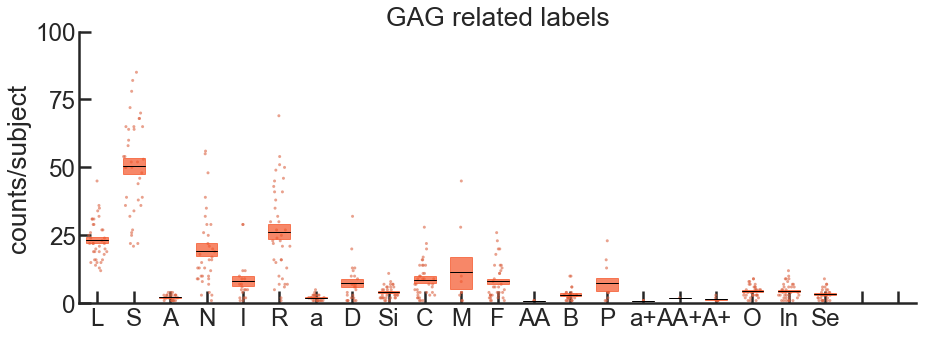

In [31]:
plt.figure(figsize=(15,5))

linares_plot(x='event', y='count', order=df_climaxfinal.event.unique(), 
            df=df_.loc[ (df_['previous_event']=='gag') ] , 
            palette=['#f55528'], CI=0.68,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=3, leg=True, sep_axis=False)

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.ylabel('counts/subject')
plt.gca().set_ylim(0,100)
plt.gca().set_yticks([0,25,50,75,100])
plt.title('GAG related labels');

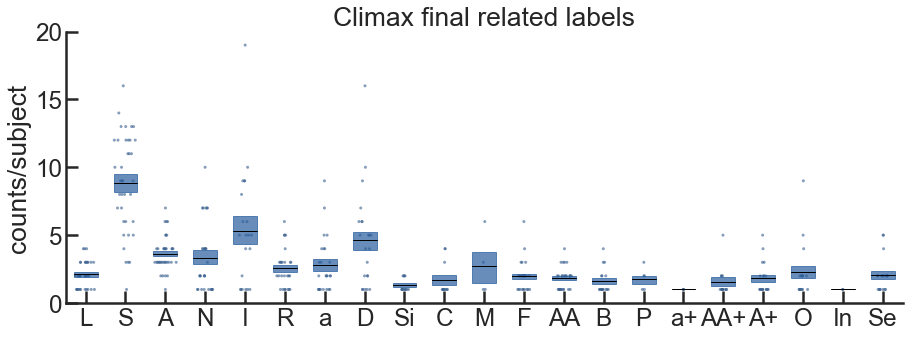

In [29]:
plt.figure(figsize=(15,5))

linares_plot(x='event', y='count', order=df_climaxfinal.event.unique(), 
            df=df_.loc[ (df_['previous_event']=='climax final') ] , 
            palette=['#285d9d'], CI=0.68,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=3, leg=True, sep_axis=False)

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
#plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('counts/subject')
#plt.gca().set_ylim(0,40)
#plt.gca().set_yticks([0,20,40])
plt.title('Climax final related labels');

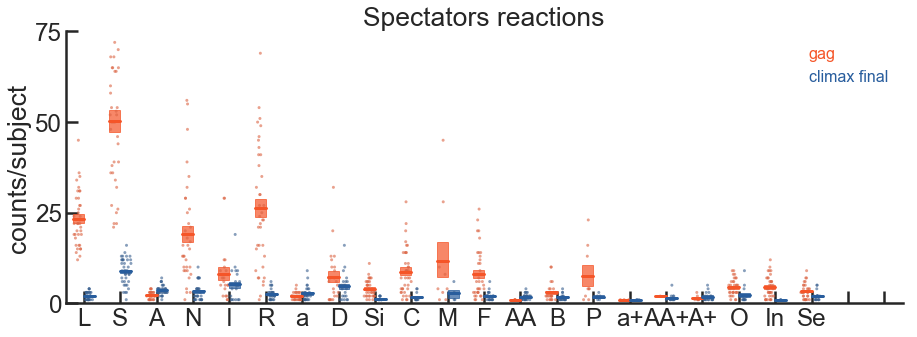

In [32]:
plt.figure(figsize=(15,5))

linares_plot(x='event', y='count', order=df_climaxfinal.event.unique(), 
             hue='previous_event', hue_order=['gag', 'climax final'], 
             df=df_, palette=['#f55528', '#285d9d'], 
             CI=0.68,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=3, leg=True, sep_axis=False)

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
#plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('counts/subject')
plt.gca().set_ylim(0,75)
plt.gca().set_yticks([0,25,50,75])
plt.title('Spectators reactions');

In [18]:
df.head()

,duration,event,subject,tiempo,time_s,trick,RT,previous_event,anticip_time,next_event,r1,r2,r3,r4,count
0,1,Se,1,00:00:06,6,1,-1,None,-21,gag,0,0,0,0,1
1,1,Si,1,00:00:10,10,1,-1,None,-17,gag,0,0,0,0,1
2,102,N,1,00:00:12,12,1,-1,None,-15,gag,0,0,0,0,1
3,1,In,1,00:00:32,32,1,5,gag,-2,gag,0,0,0,0,1
4,1,In,1,00:01:02,62,1,16,inicio,-3,gag,0,0,0,0,1


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Responses ')

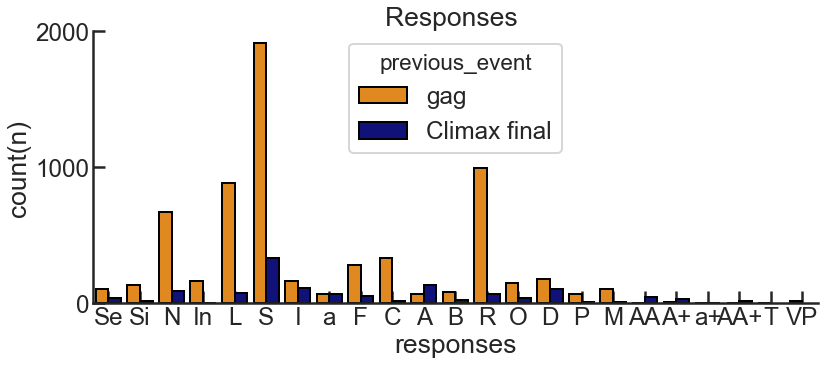

In [64]:
###arrelar (per subject)

plt.figure(figsize=(13,5))

sns.barplot(x='event', y='count', order=df.event.unique(), hue='previous_event', hue_order=['gag', 'Climax final'],
                data=df, estimator=np.sum, 
                ci=0, palette=['darkorange','darkblue'], edgecolor='black', ecolor='k', alpha=1.0)


plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
#plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('counts/subject')
#plt.gca().set_ylim(0,40)
#plt.gca().set_yticks([0,20,40])
plt.title('prev event: GAG');
plt.gca().set_xlabel('responses')
plt.gca().set_ylabel('count(n)')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().tick_params(direction='in') #direction
plt.gca().set_ylim(0,2000)
plt.gca().set_yticks([0, 1000, 2000])
plt.gca().tick_params(direction='in') #direction

plt.gca().set_title('Responses ')




In [49]:
plt.figure(figsize=(13,5))

sns.barplot(x='event', y='count', order=df.event.unique(), 
               df=df.loc[ (df['previous_event']=='gag') ] , estimator=np.sum )

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
#plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('counts/subject')
#plt.gca().set_ylim(0,40)
#plt.gca().set_yticks([0,20,40])
plt.title('prev event: GAG');
plt.gca().set_xlabel('responses')
plt.gca().set_ylabel('count(n)')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().tick_params(direction='in') #direction
plt.gca().set_ylim(0,2000)
plt.gca().set_yticks([0, 1000,2000])
plt.gca().tick_params(direction='in') #direction

plt.gca().set_title('Responses to gag')


ValueError: Could not interpret input 'event'

<Figure size 936x360 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,5))

linares_plot(x='event', y='count', order=df.event.unique(), 
            df=df.loc[ (df['previous_event']=='gag') ] , 
            palette=['#285d9d'], CI=0.68,  fill_box=True, by_subj=True, subj_col='subject', 
            reps=10, alpha_box=0.7, alpha=0.6,  point_size=3, leg=True, sep_axis=False)

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
#plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('counts/subject')
#plt.gca().set_ylim(0,40)
#plt.gca().set_yticks([0,20,40])
plt.title('prev event: GAG');

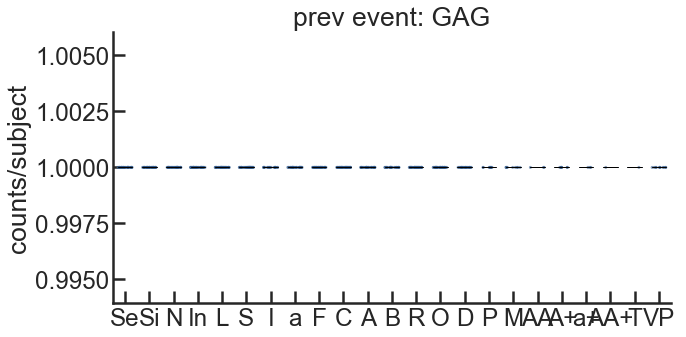

In [40]:
plt.figure(figsize=(10,5))

linares_plot(x='event', y='count', order=df.event.unique(), 
            df=df.loc[ (df['previous_event']=='gag') ] , 
            palette=['#285d9d'], CI=0.68,  fill_box=True, by_subj=True, subj_col='subject', 
            reps=10, alpha_box=0.7, alpha=0.6,  point_size=3, leg=True, sep_axis=False)

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
#plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('counts/subject')
#plt.gca().set_ylim(0,40)
#plt.gca().set_yticks([0,20,40])
plt.title('prev event: GAG');

## Subject Variability

In [25]:
df.head()

,duration,event,subject,tiempo,time_s,trick,RT,previous_event,anticip_time,next_event,r1,r2,r3,r4,trick_
0,1,Se,1,00:00:06,6,1,-1,None,-21,gag,0,0,0,0,0
1,1,Si,1,00:00:10,10,1,-1,None,-17,gag,0,0,0,0,0
2,102,N,1,00:00:12,12,1,-1,None,-15,gag,0,0,0,0,0
3,1,In,1,00:00:32,32,1,5,gag,-2,gag,0,0,0,0,0
4,1,In,1,00:01:02,62,1,16,inicio,-3,gag,0,0,0,0,1


In [45]:
A = Tx.loc[Tx['memory']==1].groupby('time').describe()['duration']
A['time'] = [0,10,45,135]

In [48]:
A

,count,mean,std,min,25%,50%,75%,max,time
time,,,,,,,,,
0,11.0,6.0,3.768289,0.0,4.00,6.0,9.5,10.0,0
10,10.0,6.6,3.272783,0.0,4.25,7.5,9.0,10.0,10
45,5.0,7.8,2.489980,4.0,7.00,8.0,10.0,10.0,45
135,3.0,8.0,2.000000,6.0,7.00,8.0,9.0,10.0,135


In [49]:
r = smf.ols(formula='mean~time', data=A).fit()
print(r.summary())

                            OLS Regression Results                            
Dep. Variable:                   mean   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     4.684
Date:                Fri, 19 Feb 2021   Prob (F-statistic):              0.163
Time:                        00:14:10   Log-Likelihood:                -2.5205
No. Observations:                   4   AIC:                             9.041
Df Residuals:                       2   BIC:                             7.814
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.4792      0.431     15.044      0.0

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


In [40]:
r = smf.ols(formula='duration~time', data=Tx.loc[Tx['memory']==1]).fit()
print(r.summary())

                            OLS Regression Results                            
Dep. Variable:               duration   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.149
Date:                Fri, 19 Feb 2021   Prob (F-statistic):              0.293
Time:                        00:12:02   Log-Likelihood:                -73.822
No. Observations:                  29   AIC:                             151.6
Df Residuals:                      27   BIC:                             154.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.3280      0.699      9.048      0.0

In [33]:
r = smf.mixedlm(formula='duration~time', data=Tx.loc[Tx['memory']==1], groups=Tx.loc[Tx['memory']==1, 'subject']).fit()
print(r.summary())

        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: duration
No. Observations: 29      Method:             REML    
No. Groups:       15      Scale:              0.0000  
Min. group size:  1       Likelihood:         64.8898 
Max. group size:  4       Converged:          Yes     
Mean group size:  1.9                                 
------------------------------------------------------
             Coef.  Std.Err.   z   P>|z| [0.025 0.975]
------------------------------------------------------
Intercept    5.867     0.681 8.617 0.000  4.532  7.201
time         0.000     0.000 0.000 1.000 -0.000  0.000
Group Var    6.953 47974.055                          



In [34]:
r = smf.ols(formula='duration~time', data=Tx.loc[Tx['memory']==1]).fit()
print(r.summary())

                            OLS Regression Results                            
Dep. Variable:               duration   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.149
Date:                Thu, 18 Feb 2021   Prob (F-statistic):              0.293
Time:                        20:27:29   Log-Likelihood:                -73.822
No. Observations:                  29   AIC:                             151.6
Df Residuals:                      27   BIC:                             154.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.3280      0.699      9.048      0.0

In [35]:
Tx.loc[Tx['memory']==1]

,subject,trick,duration,memory,time
0,1,4,4,1,0
1,1,4,4,1,10
1,8,4,9,1,10
0,12,4,4,1,0
1,12,4,4,1,10
2,12,4,4,1,45
0,15,4,6,1,0
0,16,4,0,1,0
0,17,4,5,1,0
1,17,4,5,1,10


In [138]:

r = smf.mixedlm(formula='memory~time*duration', data=T1, groups=T1['subject']).fit()
print(r.summary())

         Mixed Linear Model Regression Results
Model:              MixedLM Dependent Variable: memory  
No. Observations:   68      Method:             REML    
No. Groups:         17      Scale:              0.1052  
Min. group size:    4       Likelihood:         -50.1087
Max. group size:    4       Converged:          Yes     
Mean group size:    4.0                                 
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept      0.144    0.121  1.195 0.232 -0.092  0.381
time           0.000    0.001  0.179 0.858 -0.002  0.002
duration       0.009    0.008  1.114 0.265 -0.007  0.024
time:duration -0.000    0.000 -0.794 0.427 -0.000  0.000
Group Var      0.076    0.132                           



In [49]:
Subject = 1
trick=3

####
df_e = df.loc[(df['previous_event']=='Climax final') & (df['RT']<10) 
       & (df['subject']==Subject)  & (df['trick_']==trick)  & (df['event']=='S')   ]

if len(df_e) == 0:
    duration_ = 0
else:
    duration_ = df_e.duration.sum()

#####
r1 = df.loc[(df['subject']==Subject)  & (df['trick']==trick)   ].r1.iloc[0]
r2 = df.loc[(df['subject']==Subject)  & (df['trick']==trick)   ].r2.iloc[0]
r3 = df.loc[(df['subject']==Subject)  & (df['trick']==trick)   ].r3.iloc[0]
r4 = df.loc[(df['subject']==Subject)  & (df['trick']==trick)   ].r4.iloc[0]

results_mem.append([Subject, trick, duration_, r1, r2, r3, r4 ])


0

In [47]:
df_e

,duration,event,subject,tiempo,time_s,trick,RT,previous_event,anticip_time,next_event,r1,r2,r3,r4,trick_
74,4,S,1,00:12:20,740,3,0,Climax final,0,Climax final,0,0,0,0,3
76,4,S,1,00:12:20,740,4,0,Climax final,0,Climax final,1,1,0,0,3
78,2,S,1,00:12:28,748,4,8,Climax final,-10,inicio,1,1,0,0,3


In [27]:
t_post=15
a=df.loc[(df['previous_event']=='gag') & (df['event']=='R') & (df['RT']<t_post)]
xs = np.zeros(t_post)
y=np.arange(0, t_post)

In [36]:
strt = a.iloc[0].RT
end_durat = a.iloc[0].RT + a.iloc[0].duration

In [38]:
if end_durat < t_post:
    range_action = list(np.arange(strt, end_durat))
else:
    range_action = list(np.arange(strt, t_post))
    
#
range_action
for x in range_action:
    xs[x]=1

action = xs

In [49]:
event_x = pd.DataFrame({'times_centered': y, 'action': action})
event_x['previous_event'] = a.iloc[0].previous_event  
event_x['subject'] = a.iloc[0].subject 
event_x['trick'] = a.iloc[0].trick 

In [48]:
a.iloc[0].RT
a.iloc[0]

duration                   6
event                      R
subject                    1
tiempo              00:08:50
time_s                   530
trick                      2
RT                         6
previous_event           gag
anticip_time              -3
next_event        Miniclimax
r1                         0
r2                         0
r3                         0
r4                         0
Name: 51, dtype: object

In [44]:
len(action)

15

In [39]:
## Anotaciones (todas menos risa y sonrisa)
Df=pd.read_excel(os.getcwd() + '\\ANOTACIONES2.xlsx', sheet_name= T )


list_columns_subjects = list(Df.columns)
list_columns_subjects.remove('tiempo')

##list_columns_subjects=list_columns_subjects[0:2] ## para ir comprobando, una a una, que no haya espacios vacíos!

frames=[]

for subject in list_columns_subjects:
    #print(subject)
    dfs = Df[['tiempo', subject]]
    dfs = dfs.loc[~pd.isna(dfs[subject])] # Quitar todos los NaN (qudarnos solo con los eventos)
    ####################################### Añadir una columna de segundos
    times_s=[]
    for i in range(0, len(dfs)):
        l = dfs.tiempo.iloc[i]
        times_s.append(  int(datetime.timedelta(hours=l.hour, minutes=l.minute, seconds=l.second).total_seconds()) )
    #
    dfs.columns=['tiempo', 'event']
    dfs['time_s'] = times_s
    ####################################### Añadir columna de subject y de truco
    dfs['trick'] = int(T.split(' ')[-1]) ## last character of the string is the number of the trick
    dfs['subject'] = int(re.findall('\d+', subject)[0]) ##separate leter from number
    frames.append(dfs)
    
    
dfs=pd.concat(frames)
dfs.head()


df_subjects=[]

for subject in dfs.subject.unique():
    ####################################################### get the subject and sort by time, add duration and reset index
    df_x = dfs.loc[dfs['subject']==subject]
    df_x = df_x.sort_values(by=['time_s'])
    df_x['duration']=1
    df_x = df_x.reset_index(drop=True) 
    ###################################################### get actions with * --> calculate durations of previous and eliminate * actions
    boole=[] ###bolean to get the final of actions
    for i in range(len(df_x)):
        stri = df_x['event'].iloc[i]
        boole.append( stri[-1]=='*' )
    #
    boole=np.array(boole)
    finals = df_x[boole]
    for fi in range(len(finals)):
        event_final = finals.event.iloc[fi][:-1] ##without the astherisc
        time_final = finals.time_s.iloc[fi]
        #
        previous_event = df_x.loc[(df_x['event']==event_final) & (df_x['time_s']<time_final) ].iloc[-1] ##get the last one
        duration_event = time_final - previous_event.time_s
        ## Change the duration of the dataframe
        df_x.at[previous_event.name, 'duration'] = duration_event
    #
    df_x = df_x[~boole] ### remove the events with astherist
    ######################################################  gat applauses --> add duration (break A)
    boole_apl=[] ###bolean to get the final of actions
    for i in range(len(df_x)):
        stri = df_x['event'].iloc[i]
        if stri[0]=='a':
            boole_apl.append(True)
        elif stri[0]=='A':
            boole_apl.append(True)
        else:
            boole_apl.append(False)
    #
    boole_apl=np.array(boole_apl)    
    aplauses = df_x[boole_apl]
    for ap in range(len(aplauses)):
        event_ = aplauses.iloc[ap] 
        name_event = event_.event
        duration_app = int(re.findall('\d+', name_event)[0])
        evnt = re.split('(\d+)', name_event)[0]
        #
        df_x.at[event_.name, 'duration'] = duration_app
        df_x.at[event_.name, 'event'] = evnt
    ###
    df_subjects.append(df_x)
    #
#



df_subjects=pd.concat(df_subjects)
#df_x  ## uncomment para ir comprobando
#df_subjects.head()
#df_x


IndexError: single positional indexer is out-of-bounds

In [40]:
subject

9

In [41]:
finals

,tiempo,event,time_s,trick,subject,duration
0,00:09:36,N*,576,3,9,1
6,00:10:44,N*,644,3,9,1


In [42]:
event_final

'N'

In [ ]:
df_x.loc[(df_x['event']=='N') & (df_x['time_s']<time_final) ].iloc[-1]

In [46]:
len(df_x.loc[(df_x['event']==event_final) & (df_x['time_s']<time_final) ])

0

In [43]:
df_x.loc[(df_x['event']=='N') ]

,tiempo,event,time_s,trick,subject,duration
2,00:10:14,N,614,3,9,1
4,00:10:22,N,622,3,9,1
8,00:11:10,N,670,3,9,1


In [ ]:
df_subjects.event.unique()

In [ ]:
##correct wrong event labels
df_subjects['event'] = df_subjects['event'].replace(['L '], ['L'])
df_subjects['event'] = df_subjects['event'].replace(['L  '], ['L'])
df_subjects['event'] = df_subjects['event'].replace(['Si '], ['Si'])
df_subjects['event'] = df_subjects['event'].replace(['O '], ['O'])
df_subjects['event'] = df_subjects['event'].replace(['O  '], ['O'])
df_subjects['event'] = df_subjects['event'].replace(['In '], ['In'])
df_subjects['event'] = df_subjects['event'].replace(['In  '], ['In'])
df_subjects['event'] = df_subjects['event'].replace(['In   '], ['In'])
df_subjects['event'] = df_subjects['event'].replace(['I  '], ['I'])
df_subjects['event'] = df_subjects['event'].replace(['I   '], ['I'])
df_subjects['event'] = df_subjects['event'].replace(['C '], ['C'])
df_subjects['event'] = df_subjects['event'].replace(['  C'], ['C'])
df_subjects['event'] = df_subjects['event'].replace(['In '], ['In'])
df_subjects['event'] = df_subjects['event'].replace(['N '], ['N'])
df_subjects['event'] = df_subjects['event'].replace(['VP '], ['VP'])
df_subjects['event'] = df_subjects['event'].replace(['S '], ['S'])
df_subjects['event'] = df_subjects['event'].replace(['S  '], ['S'])
df_subjects['event'] = df_subjects['event'].replace(['F '], ['S'])

In [ ]:
df_subjects.event.unique()

In [ ]:
### Anotaciones de risa y sonrisa
df_risa = pd.read_excel(os.getcwd() + '\\ANOTACIONES3.xlsx', sheet_name= T )

list_columns_subjects = list(df_risa.columns)
list_columns_subjects.remove('Tiempo')
list_columns_subjects=list_columns_subjects ## para ir comprobando, una a una, que no haya espacios vacíos!

df_subjects_risa=[]

for COL in list_columns_subjects:
    event_type = COL[0]
    subject = int(re.findall('\d+', COL)[0])
    df_x=df_risa[['Tiempo', COL]]
    times_s=[]
    for i in range(0, len(df_x)):
        l = df_x.Tiempo.iloc[i]
        times_s.append( int(datetime.timedelta(hours=l.hour, minutes=l.minute, seconds=l.second).total_seconds())  )
    #
    df_x.columns=['tiempo', 'event']
    df_x['time_s'] = times_s
    ##########################################################
    #### get starts and durations
    counter=0
    starts=[]
    finals=[]
    for i in range(0, len(df_x)):
        if df_x.iloc[i, 1]==0:
            if counter==0:
                pass
            else:
                finals.append([df_x.loc[i, 'tiempo'], df_x.loc[i, 'event'], df_x.loc[i, 'time_s']])
                counter=0
        elif df_x.iloc[i, 1]==1:
            if counter==0:
                starts.append([df_x.loc[i, 'tiempo'], df_x.loc[i, 'event'], df_x.loc[i, 'time_s']])
            counter+=1
        ###
        if i==len(df_x)-1: ##si al final todavia están
            if counter !=0:
                finals.append([df_x.loc[i, 'tiempo'], df_x.loc[i, 'event'], df_x.loc[i, 'time_s']])
    ###
    ###
    if len(starts)>0:
        durations = np.array(finals)[:, -1] - np.array(starts)[:, -1]
        ###
        df_evnt = pd.DataFrame(starts)
        df_evnt.columns=['tiempo', 'event', 'time_s']
        df_evnt['event'] = event_type
        df_evnt['duration'] = durations
        df_evnt['subject'] = subject
        df_evnt['trick']=trick_
        df_subjects_risa.append(df_evnt)
        #print('append')
    #else:
        #print('nothing')


        
df_subjects_risa=pd.concat(df_subjects_risa)
df_subjects_risa.head()

In [30]:
##cambiando los S y los R de anotaciones2 por los de anotaciones3
df_subjects2 = df_subjects.reset_index(drop=True) 
df1 = df_subjects2.drop(df_subjects2[(df_subjects2['event']=='R') | (df_subjects2['event']=='S') ].index)
df_comb = pd.concat([df1, df_subjects_risa])
df_comb = df_comb.sort_values(by=['subject', 'time_s']) #primero por subject y, dentro de subject, por tiempo
df_comb = df_comb.reset_index(drop=True) 


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [31]:
### añadir los eventos previos y posteriores y la memoria

df_subjects_comb=[]

for subject in df_comb.subject.unique():
    #
    df_x=df_comb.loc[df_comb['subject']==subject]
    ###################################################### get previous action of the magician and Reaction time respect it
    prev_event=[]
    times_after=[]
    for evnt in range(len(df_x)):
        time_ = df_x.iloc[evnt].time_s    
        previous_events_gea = df_gea.loc[df_gea['times_s']<=time_]
        if len(previous_events_gea)==0:
            prev_event.append('None')
            times_after.append(-1)
        else:
            previous_event=previous_events_gea.evento.iloc[-1]
            prev_event.append(previous_event)
            time_after = df_x.time_s.iloc[evnt] - previous_events_gea.times_s.iloc[-1]
            times_after.append(time_after)
    ##
    df_x['RT'] = times_after
    df_x['previous_event'] = prev_event
    ###################################################### get future action of the magician and anticiipation time respect it
    next_event=[]
    times_before=[]
    for evnt in range(len(df_x)): 
        time_ = df_x.iloc[evnt].time_s    
        posts_events_gea = df_gea.loc[df_gea['times_s']>time_]
        if len(previous_events_gea)==0:
            next_event.append('None')
            times_before.append(1)
        else:
            next_evnt=posts_events_gea.evento.iloc[0]
            next_event.append(next_evnt)
            time_before = df_x.time_s.iloc[evnt] - posts_events_gea.times_s.iloc[0]
            times_before.append(time_before)
    ##
    df_x['anticip_time'] = times_before
    df_x['next_event'] = next_event
    ###################################################### add memory data
    if len(df_int.loc[(df_int['subj']==subject) & (df_int['juego']==trick_) & (df_int['tiempo']==1)]):
        r1 = df_int.loc[(df_int['subj']==subject) & (df_int['juego']==trick_) & (df_int['tiempo']==1)].recuerdo.iloc[0]
    else:
        r1='Miss'

    if len(df_int.loc[(df_int['subj']==subject) & (df_int['juego']==trick_) & (df_int['tiempo']==2)]):
        r2 = df_int.loc[(df_int['subj']==subject) & (df_int['juego']==trick_) & (df_int['tiempo']==2)].recuerdo.iloc[0]
    else:
        r2='Miss'

    if len(df_int.loc[(df_int['subj']==subject) & (df_int['juego']==trick_) & (df_int['tiempo']==3)]):
        r3 = df_int.loc[(df_int['subj']==subject) & (df_int['juego']==trick_) & (df_int['tiempo']==3)].recuerdo.iloc[0]
    else:
        r3='Miss'

    if len(df_int.loc[(df_int['subj']==subject) & (df_int['juego']==trick_) & (df_int['tiempo']==4)]):
        r4 = df_int.loc[(df_int['subj']==subject) & (df_int['juego']==trick_) & (df_int['tiempo']==4)].recuerdo.iloc[0]
    else:
        r4='Miss'

    df_x['r1'] = r1
    df_x['r2'] = r2
    df_x['r3'] = r3
    df_x['r4'] = r4
    ######################################################

    df_subjects_comb.append(df_x)
    

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

In [32]:
df=pd.concat(df_subjects_comb)
df.head()

,duration,event,subject,tiempo,time_s,trick,RT,previous_event,anticip_time,next_event,r1,r2,r3,r4
0,8,S,1,00:06:20,380,2,2,Climax final,-12,gag,0,0,0,0
1,1,N,1,00:06:24,384,2,6,Climax final,-8,gag,0,0,0,0
2,2,a,1,00:06:42,402,2,0,gag,-15,inicio,0,0,0,0
3,1,Se,1,00:06:48,408,2,6,gag,-9,inicio,0,0,0,0
4,1,B,1,00:06:50,410,2,8,gag,-7,inicio,0,0,0,0


In [33]:
df_appl = df.loc[(df['trick']==trick_) & ( (df['event']=='A') | (df['event']=='AA') 
                                                       | (df['event']=='a') | (df['event']=='A+') 
                                                          | (df['event']=='a+') | (df['event']=='AA+') 
                                                           )  ]
df_appl = df_appl[['time_s', 'duration']]
df_appl = df_appl.sort_values('time_s')
df_appl['val']=1

start_trick, end_trick =  df.loc[(df['trick']==trick_), 'time_s'].min(), df.loc[(df['trick']==trick_), 'time_s'].max()

xs = np.arange(start_trick, end_trick+2,2)
missing_times=[]
for t in xs:
    if t not in df_appl.time_s.unique():
        missing_times.append([t, 0, 0])
        
df_miss = pd.DataFrame(missing_times)
df_miss.columns=df_appl.columns
df_appl = pd.concat([df_appl, df_miss])
df_appl['general_label'] ='applause'


########################################################################################################################
########################################################################################################################

df_humr = df.loc[(df['trick']==trick_) & ( (df['event']=='S') |  (df['event']=='R')   )  ]
df_humr = df_humr[['time_s', 'duration']]
df_humr = df_humr.sort_values('time_s')
df_humr['val']=1


xs = np.arange(start_trick, end_trick+2,2)
missing_times=[]
for t in xs:
    if t not in df_humr.time_s.unique():
        missing_times.append([t, 0, 0])
        
df_miss = pd.DataFrame(missing_times)
df_miss.columns=df_humr.columns
df_humr = pd.concat([df_humr, df_miss])
df_humr['general_label'] ='humor'




C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


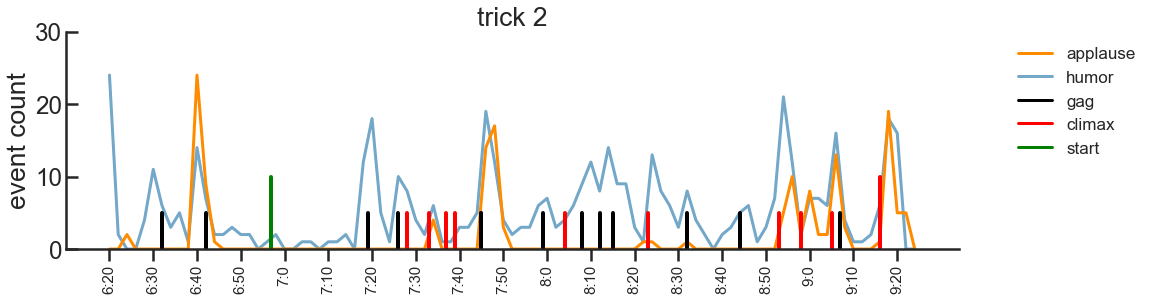

In [34]:
plt.figure(figsize=(16,4)) 

c_humor = '#73a8c9'
c_app = 'darkorange'
sns.lineplot(x='time_s', y='val', data=df_humr, color=c_humor, estimator=np.sum, linewidth=3)
sns.lineplot(x='time_s', y='val', data=df_appl, color=c_app, estimator=np.sum, linewidth=3)


events_trick = df_gea.loc[(df_gea['times_s']>start_trick) & (df_gea['times_s']<end_trick)]

for i in range(len(events_trick)):
    time_event = events_trick.iloc[i].times_s
    nature_event = events_trick.iloc[i].evento
    if nature_event == 'gag':        
        plt.plot([time_event, time_event], [0, 5], color='black', linewidth=4 )
    if nature_event == 'inicio':    
        plt.plot([time_event, time_event], [0, 10], color='green', linewidth=4 )
    elif nature_event == 'Miniclimax':        
        plt.plot([time_event, time_event], [0, 5], color='red', linewidth=4 )
    elif nature_event == 'Climax final':        
        plt.plot([time_event, time_event], [0, 10], color='red', linewidth=4 )
    else:
        pass

    
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)  
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params('y', direction='in') #direction
plt.gca().tick_params('x', direction='out') #direction



plt.xlim(start_trick-10, end_trick+10)
x_ticks = list(np.arange(start_trick, end_trick, 10) )
times_x = np.array(x_ticks)
t_m = times_x/60

strings_time=[]
for T in t_m:
    minute = int(T)
    sec = int(round((T - minute) * 60 ))
    str_time = str(minute) + ':' + str(sec)
    strings_time.append(str_time)



plt.gca().set_xticks(x_ticks);
plt.gca().set_xticklabels(strings_time, rotation=90, fontsize=15);
plt.ylabel('event count')
plt.xlabel('')
plt.ylim(0,30)

plt.plot([20,21], [100,102], c_app, label='applause')
plt.plot([20,21], [100,102], c_humor, label='humor')
plt.plot([20,21], [100,102], 'black', label='gag')
plt.plot([20,21], [100,102], 'red', label='climax')
plt.plot([20,21], [100,102], 'green', label='start')

plt.legend(frameon=False, prop={'size': 17}, bbox_to_anchor=(1.05, 1))
plt.title('trick ' + str(trick_))
plt.show()

In [119]:
#### get starts and durations
counter=0
starts=[]
finals=[]
for i in range(0, len(df_x)):
    if df_x.iloc[i, 1]==0:
        if counter==0:
            pass
        else:
            finals.append([df_x.loc[i, 'tiempo'], df_x.loc[i, 'event'], df_x.loc[i, 'time_s']])
            counter=0
    elif df_x.iloc[i, 1]==1:
        if counter==0:
            starts.append([df_x.loc[i, 'tiempo'], df_x.loc[i, 'event'], df_x.loc[i, 'time_s']])
        counter+=1
    ###
    if i==len(df_x)-1: ##si al final todavia están
        if counter !=0:
            finals.append([df_x.loc[i, 'tiempo'], df_x.loc[i, 'event'], df_x.loc[i, 'time_s']])
###
###
if len(starts)>0:
    durations = np.array(finals)[:, -1] - np.array(starts)[:, -1]
    ###
    df_evnt = pd.DataFrame(starts)
    df_evnt.columns=['tiempo', 'event', 'time_s']
    df_evnt['event'] = event_type
    df_evnt['duration'] = durations
    df_evnt['subject'] = subject
    frames.append(df_evnt)
    print('append')
else:
    print('nothing')

append


In [141]:
df_subjects=[]

for subject in dfs.subject.unique():
    ####################################################### get the subject and sort by time, add duration and reset index
    df_x = dfs.loc[dfs['subject']==subject]
    df_x = df_x.sort_values(by=['time_s'])
    df_x['duration']=1
    df_x = df_x.reset_index(drop=True) 
    ###################################################### get actions with * --> calculate durations of previous and eliminate * actions
    boole=[] ###bolean to get the final of actions
    for i in range(len(df_x)):
        stri = df_x['event'].iloc[i]
        boole.append( stri[-1]=='*' )
    #
    boole=np.array(boole)
    finals = df_x[boole]
    for fi in range(len(finals)):
        event_final = finals.event.iloc[fi][:-1] ##without the astherisc
        time_final = finals.time_s.iloc[fi]
        #
        previous_event = df_x.loc[(df_x['event']==event_final) & (df_x['time_s']<time_final) ].iloc[-1] ##get the last one
        duration_event = time_final - previous_event.time_s
        ## Change the duration of the dataframe
        df_x.at[previous_event.name, 'duration'] = duration_event
    #
    df_x = df_x[~boole] ### remove the events with astherist
    ######################################################  gat applauses --> add duration (break A)
    boole_apl=[] ###bolean to get the final of actions
    for i in range(len(df_x)):
        stri = df_x['event'].iloc[i]
        if stri[0]=='a':
            boole_apl.append(True)
        elif stri[0]=='A':
            boole_apl.append(True)
        else:
            boole_apl.append(False)
    #
    boole_apl=np.array(boole_apl)    
    aplauses = df_x[boole_apl]
    for ap in range(len(aplauses)):
        event_ = aplauses.iloc[ap] 
        name_event = event_.event
        duration_app = int(re.findall('\d+', name_event)[0])
        evnt = re.split('(\d+)', name_event)[0]
        #
        df_x.at[event_.name, 'duration'] = duration_app
        df_x.at[event_.name, 'event'] = evnt

In [144]:
df_x.head()

,tiempo,event,time_s,trick,subject,duration
0,00:00:02,A,2,1,38,5
1,00:00:08,O,8,1,38,1
2,00:00:24,S,24,1,38,1
3,00:00:26,L,26,1,38,1
4,00:00:30,O,30,1,38,1


In [143]:
df_appp.head()

,tiempo,event,time_s,duration,subject,trick
0,00:02:20,S,140,12,1,1
1,00:02:36,S,156,2,1,1
2,00:02:46,S,166,2,1,1
3,00:03:18,S,198,4,1,1
4,00:03:48,S,228,6,1,1


In [ ]:
## seleccionar truco
T='Truco 1'
trick_ = 1
df=pd.read_excel(os.getcwd() + '\\ANOTACIONES2.xlsx', sheet_name= T )

list_columns_subjects = list(df.columns)
list_columns_subjects.remove('tiempo')

#list_columns_subjects=list_columns_subjects[80:86] ## para ir comprobando, una a una, que no haya espacios vacíos!

frames=[]

for subject in list_columns_subjects:
    #print(subject)
    dfs = df[['tiempo', subject]]
    dfs = dfs.loc[~pd.isna(dfs[subject])] # Quitar todos los NaN (qudarnos solo con los eventos)
    ####################################### Añadir una columna de segundos
    times_s=[]
    for i in range(0, len(dfs)):
        l = dfs.tiempo.iloc[i]
        times_s.append(  int(datetime.timedelta(hours=l.hour, minutes=l.minute, seconds=l.second).total_seconds()) )
    #
    dfs.columns=['tiempo', 'event']
    dfs['time_s'] = times_s
    ####################################### Añadir columna de subject y de truco
    dfs['trick'] = int(T.split(' ')[-1]) ## last character of the string is the number of the trick
    dfs['subject'] = int(re.findall('\d+', subject)[0]) ##separate leter from number
    frames.append(dfs)
    
    
dfs=pd.concat(frames)
dfs.head()

In [7]:
df_subjects=[]

for subject in dfs.subject.unique():
    ####################################################### get the subject and sort by time, add duration and reset index
    df_x = dfs.loc[dfs['subject']==subject]
    df_x = df_x.sort_values(by=['time_s'])
    df_x['duration']=1
    df_x = df_x.reset_index(drop=True) 
    ###################################################### get actions with * --> calculate durations of previous and eliminate * actions
    boole=[] ###bolean to get the final of actions
    for i in range(len(df_x)):
        stri = df_x['event'].iloc[i]
        boole.append( stri[-1]=='*' )
    #
    boole=np.array(boole)
    finals = df_x[boole]
    for fi in range(len(finals)):
        event_final = finals.event.iloc[fi][:-1] ##without the astherisc
        time_final = finals.time_s.iloc[fi]
        #
        previous_event = df_x.loc[(df_x['event']==event_final) & (df_x['time_s']<time_final) ].iloc[-1] ##get the last one
        duration_event = time_final - previous_event.time_s
        ## Change the duration of the dataframe
        df_x.at[previous_event.name, 'duration'] = duration_event
    #
    df_x = df_x[~boole] ### remove the events with astherist
    ######################################################  gat applauses --> add duration (break A)
    boole_apl=[] ###bolean to get the final of actions
    for i in range(len(df_x)):
        stri = df_x['event'].iloc[i]
        if stri[0]=='a':
            boole_apl.append(True)
        elif stri[0]=='A':
            boole_apl.append(True)
        else:
            boole_apl.append(False)
    #
    boole_apl=np.array(boole_apl)    
    aplauses = df_x[boole_apl]
    for ap in range(len(aplauses)):
        event_ = aplauses.iloc[ap] 
        name_event = event_.event
        duration_app = int(re.findall('\d+', name_event)[0])
        evnt = re.split('(\d+)', name_event)[0]
        #
        df_x.at[event_.name, 'duration'] = duration_app
        df_x.at[event_.name, 'event'] = evnt
    #
    ###################################################### get previous action of the magician and Reaction time respect it
    prev_event=[]
    times_after=[]
    for evnt in range(len(df_x)):
        time_ = df_x.iloc[evnt].time_s    
        previous_events_gea = df_gea.loc[df_gea['times_s']<=time_]
        if len(previous_events_gea)==0:
            prev_event.append('None')
            times_after.append(-1)
        else:
            previous_event=previous_events_gea.evento.iloc[-1]
            prev_event.append(previous_event)
            time_after = df_x.time_s.iloc[evnt] - previous_events_gea.times_s.iloc[-1]
            times_after.append(time_after)
    ##
    df_x['RT'] = times_after
    df_x['previous_event'] = prev_event
    ###################################################### get future action of the magician and anticiipation time respect it
    next_event=[]
    times_before=[]
    for evnt in range(len(df_x)): 
        time_ = df_x.iloc[evnt].time_s    
        posts_events_gea = df_gea.loc[df_gea['times_s']>time_]
        if len(previous_events_gea)==0:
            next_event.append('None')
            times_before.append(1)
        else:
            next_evnt=posts_events_gea.evento.iloc[0]
            next_event.append(next_evnt)
            time_before = df_x.time_s.iloc[evnt] - posts_events_gea.times_s.iloc[0]
            times_before.append(time_before)
    ##
    df_x['anticip_time'] = times_before
    df_x['next_event'] = next_event
    ###################################################### add memory data
    if len(df_int.loc[(df_int['subj']==subject) & (df_int['juego']==trick_) & (df_int['tiempo']==1)]):
        r1 = df_int.loc[(df_int['subj']==subject) & (df_int['juego']==trick_) & (df_int['tiempo']==1)].recuerdo.iloc[0]
    else:
        r1='Miss'

    if len(df_int.loc[(df_int['subj']==subject) & (df_int['juego']==trick_) & (df_int['tiempo']==2)]):
        r2 = df_int.loc[(df_int['subj']==subject) & (df_int['juego']==trick_) & (df_int['tiempo']==2)].recuerdo.iloc[0]
    else:
        r2='Miss'

    if len(df_int.loc[(df_int['subj']==subject) & (df_int['juego']==trick_) & (df_int['tiempo']==3)]):
        r3 = df_int.loc[(df_int['subj']==subject) & (df_int['juego']==trick_) & (df_int['tiempo']==3)].recuerdo.iloc[0]
    else:
        r3='Miss'

    if len(df_int.loc[(df_int['subj']==subject) & (df_int['juego']==trick_) & (df_int['tiempo']==4)]):
        r4 = df_int.loc[(df_int['subj']==subject) & (df_int['juego']==trick_) & (df_int['tiempo']==4)].recuerdo.iloc[0]
    else:
        r4='Miss'

    df_x['r1'] = r1
    df_x['r2'] = r2
    df_x['r3'] = r3
    df_x['r4'] = r4
    ######################################################

    df_subjects.append(df_x)
    

    
    

In [8]:
df_subjects=pd.concat(df_subjects)

In [9]:
df_subjects

,tiempo,event,time_s,trick,subject,duration,RT,previous_event,anticip_time,next_event,r1,r2,r3,r4
0,00:06:24,N,384,2,1,1,6,Climax final,-8,gag,0,0,0,0
1,00:06:32,S,392,2,1,1,0,gag,-10,gag,0,0,0,0
2,00:06:42,a,402,2,1,2,0,gag,-15,inicio,0,0,0,0
3,00:06:48,Se,408,2,1,1,6,gag,-9,inicio,0,0,0,0
4,00:06:50,B,410,2,1,1,8,gag,-7,inicio,0,0,0,0
5,00:06:52,B,412,2,1,1,10,gag,-5,inicio,0,0,0,0
6,00:06:52,L,412,2,1,1,10,gag,-5,inicio,0,0,0,0
7,00:07:18,B,438,2,1,1,21,inicio,-1,gag,0,0,0,0
8,00:07:18,S,438,2,1,1,21,inicio,-1,gag,0,0,0,0
9,00:07:22,In,442,2,1,1,3,gag,-4,gag,0,0,0,0


In [10]:
df_subjects.event.unique()

array(['N', 'S', 'a', 'Se', 'B', 'L', 'In', 'R', 'Si', 'A', 'D', 'P', 'C',
       'F', 'M', 'T', 'O', 'A+', 'a+', 'I', 'M (VP)', 'N ', 'In '],
      dtype=object)

In [11]:
df_subjects['event'] = df_subjects['event'].replace(['L '], ['L'])
df_subjects['event'] = df_subjects['event'].replace(['Si '], ['Si'])
df_subjects['event'] = df_subjects['event'].replace(['O '], ['O'])
df_subjects['event'] = df_subjects['event'].replace(['O  '], ['O'])
df_subjects['event'] = df_subjects['event'].replace(['In '], ['In'])
df_subjects['event'] = df_subjects['event'].replace(['In  '], ['In'])
df_subjects['event'] = df_subjects['event'].replace(['In   '], ['In'])
df_subjects['event'] = df_subjects['event'].replace(['I  '], ['I'])
df_subjects['event'] = df_subjects['event'].replace(['I   '], ['I'])
df_subjects['event'] = df_subjects['event'].replace(['C '], ['C'])
df_subjects['event'] = df_subjects['event'].replace(['  C'], ['C'])
df_subjects['event'] = df_subjects['event'].replace(['In '], ['In'])
df_subjects['event'] = df_subjects['event'].replace(['N '], ['N'])



In [12]:
df_subjects.event.unique()

array(['N', 'S', 'a', 'Se', 'B', 'L', 'In', 'R', 'Si', 'A', 'D', 'P', 'C',
       'F', 'M', 'T', 'O', 'A+', 'a+', 'I', 'M (VP)'], dtype=object)

In [13]:
df_subjects.head()

,tiempo,event,time_s,trick,subject,duration,RT,previous_event,anticip_time,next_event,r1,r2,r3,r4
0,00:06:24,N,384,2,1,1,6,Climax final,-8,gag,0,0,0,0
1,00:06:32,S,392,2,1,1,0,gag,-10,gag,0,0,0,0
2,00:06:42,a,402,2,1,2,0,gag,-15,inicio,0,0,0,0
3,00:06:48,Se,408,2,1,1,6,gag,-9,inicio,0,0,0,0
4,00:06:50,B,410,2,1,1,8,gag,-7,inicio,0,0,0,0


In [14]:
df_appl = df_subjects.loc[(df_subjects['trick']==trick_) & ( (df_subjects['event']=='A') | (df_subjects['event']=='AA') 
                                                       | (df_subjects['event']=='a') | (df_subjects['event']=='A+') 
                                                          | (df_subjects['event']=='a+') | (df_subjects['event']=='AA+') 
                                                           )  ]
df_appl = df_appl[['time_s', 'duration']]
df_appl = df_appl.sort_values('time_s')
df_appl['val']=1

start_trick, end_trick =  df_subjects.loc[(df_subjects['trick']==trick_), 'time_s'].min(), df_subjects.loc[(df_subjects['trick']==trick_), 'time_s'].max()

xs = np.arange(start_trick, end_trick+2,2)
missing_times=[]
for t in xs:
    if t not in df_appl.time_s.unique():
        missing_times.append([t, 0, 0])
        
df_miss = pd.DataFrame(missing_times)
df_miss.columns=df_appl.columns
df_appl = pd.concat([df_appl, df_miss])
df_appl['general_label'] ='applause'

df_appl.head()

########################################################################################################################
########################################################################################################################

df_humr = df_subjects.loc[(df_subjects['trick']==trick_) & ( (df_subjects['event']=='S') |  (df_subjects['event']=='R')   )  ]
df_humr = df_humr[['time_s', 'duration']]
df_humr = df_humr.sort_values('time_s')
df_humr['val']=1


xs = np.arange(start_trick, end_trick+2,2)
missing_times=[]
for t in xs:
    if t not in df_humr.time_s.unique():
        missing_times.append([t, 0, 0])
        
df_miss = pd.DataFrame(missing_times)
df_miss.columns=df_humr.columns
df_humr = pd.concat([df_humr, df_miss])
df_humr['general_label'] ='humor'

df_humr.head()


,time_s,duration,val,general_label
0,384,1,1,humor
1,384,1,1,humor
0,384,1,1,humor
0,384,1,1,humor
1,384,1,1,humor


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


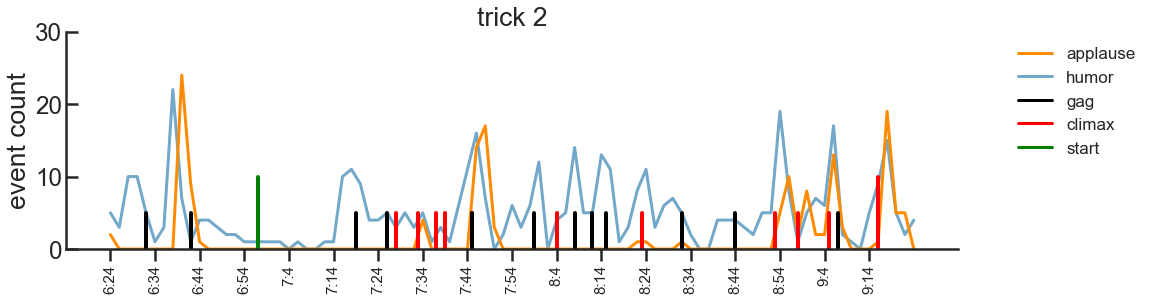

In [15]:
plt.figure(figsize=(16,4)) 

c_humor = '#73a8c9'
c_app = 'darkorange'
sns.lineplot(x='time_s', y='val', data=df_humr, color=c_humor, estimator=np.sum, linewidth=3)
sns.lineplot(x='time_s', y='val', data=df_appl, color=c_app, estimator=np.sum, linewidth=3)


events_trick = df_gea.loc[(df_gea['times_s']>start_trick) & (df_gea['times_s']<end_trick)]

for i in range(len(events_trick)):
    time_event = events_trick.iloc[i].times_s
    nature_event = events_trick.iloc[i].evento
    if nature_event == 'gag':        
        plt.plot([time_event, time_event], [0, 5], color='black', linewidth=4 )
    if nature_event == 'inicio':    
        plt.plot([time_event, time_event], [0, 10], color='green', linewidth=4 )
    elif nature_event == 'Miniclimax':        
        plt.plot([time_event, time_event], [0, 5], color='red', linewidth=4 )
    elif nature_event == 'Climax final':        
        plt.plot([time_event, time_event], [0, 10], color='red', linewidth=4 )
    else:
        pass

    
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)  
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params('y', direction='in') #direction
plt.gca().tick_params('x', direction='out') #direction



plt.xlim(start_trick-10, end_trick+10)
x_ticks = list(np.arange(start_trick, end_trick, 10) )
times_x = np.array(x_ticks)
t_m = times_x/60

strings_time=[]
for T in t_m:
    minute = int(T)
    sec = int(round((T - minute) * 60 ))
    str_time = str(minute) + ':' + str(sec)
    strings_time.append(str_time)



plt.gca().set_xticks(x_ticks);
plt.gca().set_xticklabels(strings_time, rotation=90, fontsize=15);
plt.ylabel('event count')
plt.xlabel('')
plt.ylim(0,30)

plt.plot([20,21], [100,102], c_app, label='applause')
plt.plot([20,21], [100,102], c_humor, label='humor')
plt.plot([20,21], [100,102], 'black', label='gag')
plt.plot([20,21], [100,102], 'red', label='climax')
plt.plot([20,21], [100,102], 'green', label='start')

plt.legend(frameon=False, prop={'size': 17}, bbox_to_anchor=(1.05, 1))
plt.title('trick ' + str(trick_))
plt.show()


In [173]:
subject=3
df_x = dfs.loc[dfs['subject']==subject]
df_x = df_x.sort_values(by=['time_s'])
df_x['duration']=1
df_x = df_x.reset_index(drop=True) 
df_x.head()

,tiempo,event,time_s,trick,subject,duration
0,00:00:02,a4,2,1,3,1
1,00:00:06,O,6,1,3,1
2,00:00:14,S,14,1,3,1
3,00:00:22,O,22,1,3,1
4,00:00:26,R,26,1,3,1


In [174]:
boole=[] ###bolean to get the final of actions
for i in range(len(df_x)):
    stri = df_x['event'].iloc[i]
    boole.append( stri[-1]=='*' )

boole=np.array(boole)    
    
finals = df_x[boole]
finals

,tiempo,event,time_s,trick,subject,duration
5,00:00:28,O*,28,1,3,1


In [175]:
for fi in range(len(finals)):
    event_final = finals.event.iloc[fi][:-1] ##without the astherisc
    time_final = finals.time_s.iloc[fi]
    #
    previous_event = df_x.loc[(df_x['event']==event_final) & (df_x['time_s']<time_final) ].iloc[-1] ##get the last one
    duration_event = time_final - previous_event.time_s
    ## Change the duration of the dataframe
    df_x.at[previous_event.name, 'duration'] = duration_event
    
##
df_x = df_x[~boole] ### remove the events with astherist

In [176]:
boole_apl=[] ###bolean to get the final of actions
for i in range(len(df_x)):
    stri = df_x['event'].iloc[i]
    if stri[0]=='a':
        boole_apl.append(True)
    elif stri[0]=='A':
        boole_apl.append(True)
    else:
        boole_apl.append(False)
    
boole_apl=np.array(boole_apl)    
    
aplauses = df_x[boole_apl]
aplauses

,tiempo,event,time_s,trick,subject,duration
0,00:00:02,a4,2,1,3,1
43,00:05:56,A7,356,1,3,1
45,00:06:18,A+6,378,1,3,1


In [177]:
for ap in range(len(aplauses)):
    event_ = aplauses.iloc[ap] 
    name_event = event_.event
    duration_app = int(re.findall('\d+', name_event)[0])
    evnt = re.split('(\d+)', name_event)[0]
    #
    df_x.at[event_.name, 'duration'] = duration_app
    df_x.at[event_.name, 'event'] = evnt
    

In [178]:
df_x.head()

,tiempo,event,time_s,trick,subject,duration
0,00:00:02,a,2,1,3,4
1,00:00:06,O,6,1,3,1
2,00:00:14,S,14,1,3,1
3,00:00:22,O,22,1,3,6
4,00:00:26,R,26,1,3,1


In [179]:
prev_event=[]
times_after=[]

for evnt in range(len(df_x)): ##len(df_x)
    time_ = df_x.iloc[evnt].time_s    
    previous_events_gea = df_gea.loc[df_gea['times_s']<=time_]
    if len(previous_events_gea)==0:
        prev_event.append('None')
        times_after.append(-1)
    else:
        previous_event=previous_events_gea.evento.iloc[-1]
        prev_event.append(previous_event)
        time_after = df_x.time_s.iloc[evnt] - previous_events_gea.times_s.iloc[-1]
        times_after.append(time_after)

##
df_x['RT'] = times_after
df_x['previous_event'] = prev_event

In [168]:
df_x.head(10)

,tiempo,event,time_s,trick,subject,duration,RT,previous_event
0,00:00:02,a,2,1,3,4,-1,None
1,00:00:06,O,6,1,3,1,-1,None
2,00:00:14,S,14,1,3,1,-1,None
3,00:00:22,O,22,1,3,6,-1,None
4,00:00:26,R,26,1,3,1,-1,None
6,00:00:48,P,48,1,3,1,2,inicio
7,00:00:52,L,52,1,3,1,6,inicio
8,00:01:04,S,64,1,3,1,18,inicio
9,00:01:18,P,78,1,3,1,13,gag
10,00:01:18,S,78,1,3,1,13,gag


In [180]:
next_event=[]
times_before=[]

for evnt in range(len(df_x)): ##len(df_x)
    time_ = df_x.iloc[evnt].time_s    
    posts_events_gea = df_gea.loc[df_gea['times_s']>time_]
    if len(previous_events_gea)==0:
        next_event.append('None')
        times_before.append(1)
    else:
        next_evnt=posts_events_gea.evento.iloc[0]
        next_event.append(next_evnt)
        time_before = df_x.time_s.iloc[evnt] - posts_events_gea.times_s.iloc[0]
        times_before.append(time_before)

##
df_x['anticip_time'] = times_before
df_x['next_event'] = next_event

In [181]:
df_x.head(10)

,tiempo,event,time_s,trick,subject,duration,RT,previous_event,anticip_time,next_event
0,00:00:02,a,2,1,3,4,-1,None,-25,gag
1,00:00:06,O,6,1,3,1,-1,None,-21,gag
2,00:00:14,S,14,1,3,1,-1,None,-13,gag
3,00:00:22,O,22,1,3,6,-1,None,-5,gag
4,00:00:26,R,26,1,3,1,-1,None,-1,gag
6,00:00:48,P,48,1,3,1,2,inicio,-17,gag
7,00:00:52,L,52,1,3,1,6,inicio,-13,gag
8,00:01:04,S,64,1,3,1,18,inicio,-1,gag
9,00:01:18,P,78,1,3,1,13,gag,-1,gag
10,00:01:18,S,78,1,3,1,13,gag,-1,gag


In [214]:

if len(df_int.loc[(df_int['subj']==subject) & (df_int['juego']==1) & (df_int['tiempo']==1)]):
    r1 = df_int.loc[(df_int['subj']==subject) & (df_int['juego']==1) & (df_int['tiempo']==1)].recuerdo.iloc[0]
else:
    r1='Miss'

if len(df_int.loc[(df_int['subj']==subject) & (df_int['juego']==1) & (df_int['tiempo']==2)]):
    r2 = df_int.loc[(df_int['subj']==subject) & (df_int['juego']==1) & (df_int['tiempo']==2)].recuerdo.iloc[0]
else:
    r2='Miss'

if len(df_int.loc[(df_int['subj']==subject) & (df_int['juego']==1) & (df_int['tiempo']==3)]):
    r3 = df_int.loc[(df_int['subj']==subject) & (df_int['juego']==1) & (df_int['tiempo']==3)].recuerdo.iloc[0]
else:
    r3='Miss'

if len(df_int.loc[(df_int['subj']==subject) & (df_int['juego']==1) & (df_int['tiempo']==4)]):
    r4 = df_int.loc[(df_int['subj']==subject) & (df_int['juego']==1) & (df_int['tiempo']==4)].recuerdo.iloc[0]
else:
    r4='Miss'
    
df_x['r1'] = r1
df_x['r2'] = r2
df_x['r3'] = r3
df_x['r4'] = r4
    


In [221]:
df_x.head(10)

,tiempo,event,time_s,trick,subject,duration,RT,previous_event,anticip_time,next_event,r1,r2,r3,r4
0,00:00:02,A,2,1,38,5,-1,None,-25,gag,0,Miss,Miss,Miss
1,00:00:08,O,8,1,38,1,-1,None,-19,gag,0,Miss,Miss,Miss
2,00:00:24,S,24,1,38,1,-1,None,-3,gag,0,Miss,Miss,Miss
3,00:00:26,L,26,1,38,1,-1,None,-1,gag,0,Miss,Miss,Miss
4,00:00:30,O,30,1,38,1,3,gag,-4,gag,0,Miss,Miss,Miss
5,00:00:34,Se,34,1,38,1,0,gag,-12,inicio,0,Miss,Miss,Miss
6,00:01:04,In,64,1,38,1,18,inicio,-1,gag,0,Miss,Miss,Miss
7,00:01:34,In,94,1,38,1,3,gag,-25,gag,0,Miss,Miss,Miss
8,00:01:52,S,112,1,38,1,21,gag,-7,gag,0,Miss,Miss,Miss
9,00:01:52,D,112,1,38,1,21,gag,-7,gag,0,Miss,Miss,Miss


In [301]:
previous_event.name

136

In [286]:
df_x = df_x.reset_index()
df_x

ValueError: cannot insert level_0, already exists

In [281]:
df_x.iloc[previous_event.name, 'duration']=25

IndexError: single positional indexer is out-of-bounds

In [271]:
df_x.loc[(df_x['event']==event_final) & (df_x['time_s']<time_final), 'duration' ].iloc[-1] 

0

In [276]:
df_x.loc[(df_x['event']==event_final) & (df_x['time_s']<time_final)].iloc[-1].duration

0

In [274]:
df_x

,tiempo,event,time_s,trick,subject,duration
3,00:00:06,Se,6,1,1,0
5,00:00:10,Si,10,1,1,0
6,00:00:12,N,12,1,1,0
16,00:00:32,In,32,1,1,0
31,00:01:02,In,62,1,1,0
46,00:01:32,In,92,1,1,0
54,00:01:48,L,108,1,1,0
57,00:01:54,N*,114,1,1,0
57,00:01:54,L,114,1,1,0
61,00:02:02,N,122,1,1,0


In [255]:
previous_event = df_x.loc[(df_x['event']=='N') & (df_x['time_s']<114) ].iloc[-1]

tiempo     00:00:12
event             N
time_s           12
trick             1
subject           1
Name: 6, dtype: object

'A8'

In [37]:
l = df.tiempo.iloc[158### hacer columna de tiempo en segundos
times_s=[]
for i in range(0, len(df)):
    l = df.tiempo.iloc[158]
    times_s.append(  int(datetime.timedelta(hours=l.hour, minutes=l.minute, seconds=l.second).total_seconds()) )



df['time_s'] = times_s
df.head()]
print(l.hour)
print(l.minute)
print(l.second)

0
5
16


In [38]:
l = df.tiempo.iloc[158]
int(datetime.timedelta(hours=l.hour, minutes=l.minute, seconds=l.second).total_seconds())

316

In [11]:
from datetime import datetime

datetime.strptime(df.tiempo.iloc[0], "%H:%M:%S")

TypeError: strptime() argument 1 must be str, not datetime.time